## 라이브러리

In [1]:
# 데이터 분석 기본 라이브러리 관련
import os
import sys
import warnings
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd

# EDA 관련
import matplotlib
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 데이터 전처리 관련
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 100)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

## 전체적으로 사용되는 함수

In [118]:
def MSG(x):
    if x['SMS\n수신여부']=='수신':
        return 'Y'
    else:
        return 'N'
    
def DateToStr1(x):
    return str(x['최종접수일'])

def DateToStr2(x):
    return str(x['가입일'])

def DateToStr3(x):
    return str(x['최종방문일▼'])

def DateToStr4(x):
    return str(x['최종방문일'])

def StringToStr(x):
    return str(x['고객번호'])

---
## 데이터불러오기

In [57]:
pos=pd.read_excel('./고객data/꿈꾸는이상(주) 길음신관_고객현황조회_20210316.xlsx')

In [93]:
res=pd.read_excel('./고객data/(갈비명가이상 길음신관)데이터_20210415.xlsx')

In [6]:
excel=pd.read_excel('./고객data/2018 04 길신.xlsx')

In [7]:
msg=pd.read_excel('./고객data/뿌리오지점별고객리스트.xlsx',skiprows=2)

In [8]:
pur=pd.read_excel('./고객data/고객구매정보_2004_2103.xlsx')

## 1) 포스데이터

In [58]:
print(pos.shape)
pos.head()

(14519, 21)


,NO,고객번호,고객명,매장명,등급,성별,생년월일,전화번호,핸드폰번호,구매금액,구매횟수,포인트,가입일,최종방문일▼,우편번호,주소,상세주소,메일주소,SMS\n수신여부,기념일,비고
0,1,24120,성대경,꿈꾸는이상(길음신관),일반,여자,NaN,02--,010-3702-2738,527000,10,10010,2012-11-08,2017-01-01,NaN,NaN,NaN,NaN,수신,NaN,NaN
1,2,29090,이은경,꿈꾸는이상(길음신관),일반,남자,NaN,02--,010-3330-6609,261000,3,4180,2013-04-13,2017-01-01,NaN,NaN,NaN,NaN,수신,NaN,NaN
2,3,31696,강유선,꿈꾸는이상(길음신관),일반,남자,NaN,02--,010-2808-1346,71000,3,1240,2013-07-23,2017-01-01,NaN,NaN,NaN,NaN,수신,NaN,NaN
3,4,42274,김선영,꿈꾸는이상(길음신관),일반,여자,NaN,02--,010-7293-4001,407000,5,5300,2015-03-04,2017-01-01,NaN,NaN,NaN,NaN,미수신,NaN,NaN
4,5,48526,전승원,꿈꾸는이상(길음신관),일반,남자,NaN,02--,010-6853-4153,112000,1,1120,2015-07-14,2017-01-01,NaN,NaN,NaN,NaN,미수신,NaN,NaN


#### 1. 각 열에 결측값 확인

In [59]:
pos.drop('NO',axis=1,inplace=True)
pos.isnull().sum()

고객번호             0
고객명              0
매장명              0
등급               0
성별               0
생년월일         13044
전화번호            58
핸드폰번호            1
구매금액             0
구매횟수             0
포인트              0
가입일              0
최종방문일▼           0
우편번호         14279
주소           14335
상세주소         14355
메일주소         14457
SMS\n수신여부        0
기념일          14518
비고           14518
dtype: int64

-> 생년월일, 전화번호, 우편번호, 주소, 상세주소, 메일주소, 기념일, 비고에 대해서 결측치 존재( 대부분의 데이터가 결측임 )
#### 2. 정보가 있는 데이터만 가져와서 새로운 데이터 셋 생성

In [60]:
pos.drop(['생년월일','전화번호','우편번호','주소','상세주소','메일주소','기념일','비고'],axis=1,inplace=True)

In [61]:
pos

,고객번호,고객명,매장명,등급,성별,핸드폰번호,구매금액,구매횟수,포인트,가입일,최종방문일▼,SMS\n수신여부
0,24120,성대경,꿈꾸는이상(길음신관),일반,여자,010-3702-2738,527000,10,10010,2012-11-08,2017-01-01,수신
1,29090,이은경,꿈꾸는이상(길음신관),일반,남자,010-3330-6609,261000,3,4180,2013-04-13,2017-01-01,수신
2,31696,강유선,꿈꾸는이상(길음신관),일반,남자,010-2808-1346,71000,3,1240,2013-07-23,2017-01-01,수신
3,42274,김선영,꿈꾸는이상(길음신관),일반,여자,010-7293-4001,407000,5,5300,2015-03-04,2017-01-01,미수신
4,48526,전승원,꿈꾸는이상(길음신관),일반,남자,010-6853-4153,112000,1,1120,2015-07-14,2017-01-01,미수신
...,...,...,...,...,...,...,...,...,...,...,...,...
14514,94113,하은이,꿈꾸는이상(길음신관),일반,여자,010-2632-6484,508600,5,5086,2019-05-16,2020-12-31,미수신
14515,105549,박형숙,꿈꾸는이상(길음신관),일반,여자,010-8749-9936,126000,4,1260,2020-10-25,2020-12-31,수신
14516,106411,심동윤,꿈꾸는이상(길음신관),일반,남자,010-6398-9924,171000,1,1710,2020-12-31,2020-12-31,수신
14517,106415,이금희,꿈꾸는이상(길음신관),일반,남자,010-8325-8004,28000,1,280,2020-12-31,2020-12-31,수신


#### 3. easyPOS안의 길음신관 고객수

In [62]:
pos['고객번호'].nunique()

14519

#### 4. easyPOS안의 고객들의 기존 등급

In [63]:
pos['등급'].unique()

array(['일반', 'VIP 블루', 'VVIP회원', 'VIP 퍼플', '사용안함', 'VIP 블랙'], dtype=object)

In [64]:
a=pos['등급'].value_counts().reset_index()
a

,index,등급
0,일반,14474
1,VIP 블루,23
2,VIP 퍼플,16
3,VIP 블랙,4
4,VVIP회원,1
5,사용안함,1


In [65]:
pos[pos['등급']=='VIP 블루']

,고객번호,고객명,매장명,등급,성별,핸드폰번호,구매금액,구매횟수,포인트,가입일,최종방문일▼,SMS\n수신여부
54,6809,이동수,꿈꾸는이상(길음신관),VIP 블루,남자,010-2481-3343,6245000,31,15940,2011-12-12,2017-01-07,수신
144,3561,이정민,꿈꾸는이상(길음신관),VIP 블루,여자,010-6623-7327,4487000,25,1320,2011-08-28,2017-01-22,수신
217,2356,정혜숙,꿈꾸는이상(길음신관),VIP 블루,여자,010-9496-6407,3537500,22,25039,2011-07-17,2017-02-06,수신
337,13165,양동귀,꿈꾸는이상(길음신관),VIP 블루,남자,010-5251-2130,4512700,10,11184,2012-02-04,2017-04-16,수신
668,3366,김희숙,꿈꾸는이상(길음신관),VIP 블루,여자,010-4562-2082,5096000,39,14230,2011-08-22,2017-06-05,수신
1103,15283,김병삼,꿈꾸는이상(길음신관),VIP 블루,남자,010-4256-4243,9249200,24,2449,2012-04-06,2017-08-09,수신
1568,22,강명자,꿈꾸는이상(길음신관),VIP 블루,여자,010-2914-3180,2504830,22,7356,2011-05-18,2017-10-16,수신
1795,627,이은우,꿈꾸는이상(길음신관),VIP 블루,여자,010-4099-3164,5343600,36,10443,2011-05-29,2017-11-24,수신
2807,15501,남보희,꿈꾸는이상(길음신관),VIP 블루,남자,010-8930-8115,2587000,23,2570,2012-04-12,2018-04-10,수신
5238,249,안정삼,꿈꾸는이상(길음신관),VIP 블루,남자,010-9966-7974,3349500,43,7844,2011-05-22,2019-01-12,수신


In [66]:
pos[pos['등급']=='VIP 퍼플']

,고객번호,고객명,매장명,등급,성별,핸드폰번호,구매금액,구매횟수,포인트,가입일,최종방문일▼,SMS\n수신여부
1583,23948,심강만,꿈꾸는이상(길음신관),VIP 퍼플,남자,011-9163-6634,4286000,4,27710,2012-11-02,2017-10-19,수신
3009,24866,정준환,꿈꾸는이상(길음신관),VIP 퍼플,남자,010-2011-2409,14610400,24,28193,2012-11-27,2018-05-05,수신
4043,363,일신초교,꿈꾸는이상(길음신관),VIP 퍼플,여자,010-9168-1584,8830100,39,2300,2011-05-24,2018-08-28,수신
4690,1097,오홍석,꿈꾸는이상(길음신관),VIP 퍼플,남자,011-230-6798,4850500,15,152430,2011-06-08,2018-11-14,수신
5021,13271,이재선,꿈꾸는이상(길음신관),VIP 퍼플,남자,010-3291-4828,4177600,25,4832,2012-02-08,2018-12-21,수신
5840,117,지옥화47,꿈꾸는이상(길음신관),VIP 퍼플,여자,010-4746-7354,3179500,14,1980,2011-05-20,2019-03-15,수신
6506,3499,정의영,꿈꾸는이상(길음신관),VIP 퍼플,남자,010-7686-8110,16912300,58,17903,2011-08-26,2019-05-24,수신
6507,3617,신승온,꿈꾸는이상(길음신관),VIP 퍼플,남자,010-3099-1710,3915000,32,8976,2011-09-01,2019-05-24,수신
8142,15980,대한맹인복지,꿈꾸는이상(길음신관),VIP 퍼플,남자,010-000-0000,3388500,10,13305,2012-04-27,2019-11-01,수신
9870,2257,김재경,꿈꾸는이상(길음신관),VIP 퍼플,남자,010-7258-7711,4291900,20,9153,2011-07-13,2020-03-14,수신


In [67]:
pos[(pos['등급']=='VIP 블랙')|(pos['등급']=='VVIP회원')|(pos['등급']=='사용안함')]

,고객번호,고객명,매장명,등급,성별,핸드폰번호,구매금액,구매횟수,포인트,가입일,최종방문일▼,SMS\n수신여부
1289,34428,VVIP회원,꿈꾸는이상(길음신관),VVIP회원,남자,NaN,2675200,21,0,2014-01-03,2017-08-30,미수신
2817,82680,정유미,꿈꾸는이상(길음신관),사용안함,여자,010-3737-1437,80000,1,0,2018-04-11,2018-04-11,수신
6161,153,현명구,꿈꾸는이상(길음신관),VIP 블랙,남자,010-3001-1281,7127236,37,44007,2011-05-21,2019-04-20,수신
6382,7042,정운주,꿈꾸는이상(길음신관),VIP 블랙,여자,010-3227-6142,14156600,21,63567,2011-12-14,2019-05-09,수신
8397,10228,조경덕,꿈꾸는이상(길음신관),VIP 블랙,남자,010-8766-2600,7286800,42,9341,2011-12-31,2019-11-19,수신
9833,320,유태호,꿈꾸는이상(길음신관),VIP 블랙,남자,010-2501-1678,14509100,165,6731,2011-05-23,2020-03-09,수신


In [68]:
pos.groupby(['성별','등급']).size().unstack().fillna(0)

등급,VIP 블랙,VIP 블루,VIP 퍼플,VVIP회원,사용안함,일반
성별,,,,,,
남자,3.0,11.0,13.0,1.0,0.0,6386.0
여자,1.0,12.0,3.0,0.0,1.0,8088.0


#### 5. 달 별 가입한 고객의 수 & 그래프

In [69]:
a=pd.DataFrame(pos['가입일'].value_counts())
a=a.resample('1M').sum()
a

,가입일
2011-05-31,197
2011-06-30,295
2011-07-31,189
2011-08-31,192
2011-09-30,99
...,...
2020-08-31,82
2020-09-30,71
2020-10-31,83
2020-11-30,75


Text(0.5, 1.0, '월별 길음신관 신규 가입자 수')

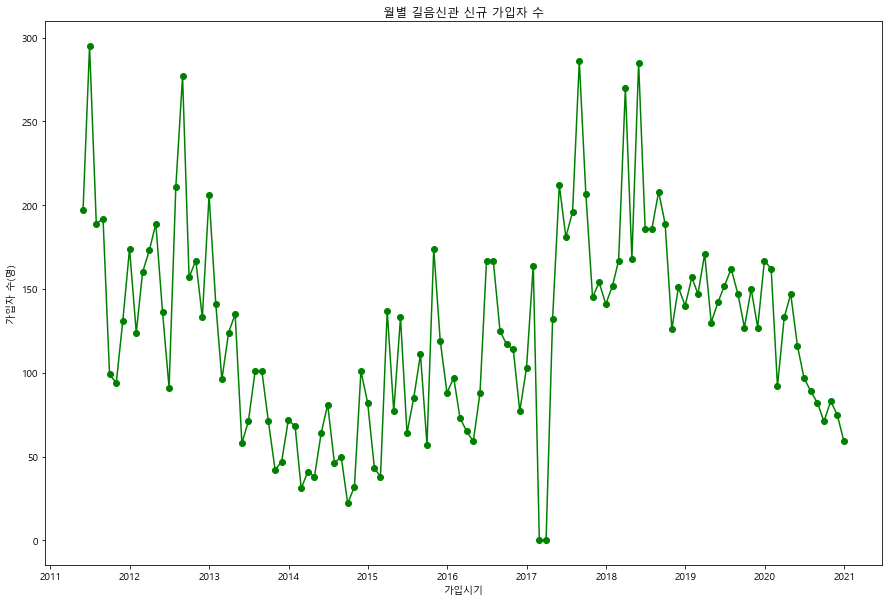

In [70]:
plt.figure(figsize=(15,10))
plt.plot(a.index,a['가입일'], marker="o", color = "green")
plt.xlabel('가입시기')
plt.ylabel('가입자 수(명)')
plt.title('월별 길음신관 신규 가입자 수')

#### 6. 달 별 최종방문한 고객수 & 그래프

Text(0.5, 1.0, '월별 길음신관 최종 방문자 수')

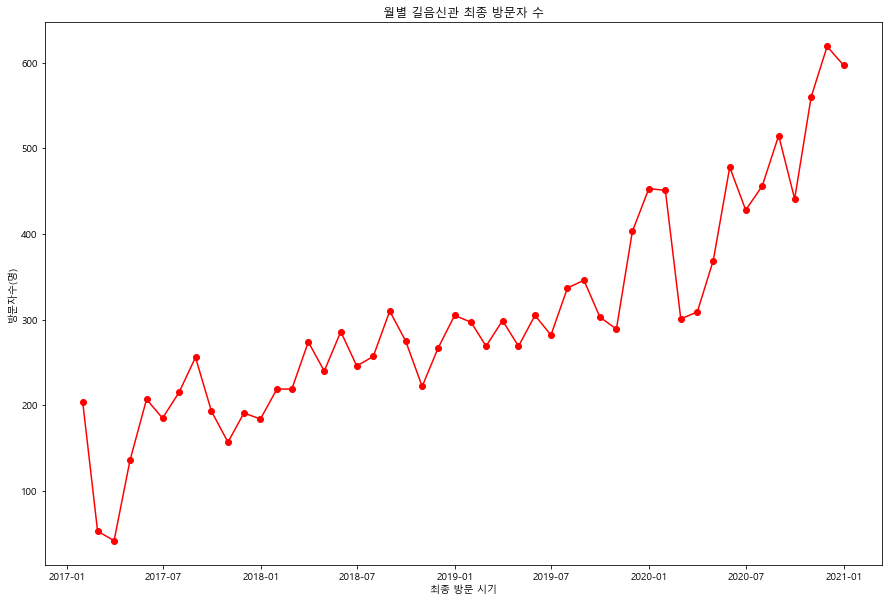

In [71]:
a=pd.DataFrame(pos['최종방문일▼'].value_counts())
a=a.resample('1M').sum()
plt.figure(figsize=(15,10))
plt.plot(a.index,a['최종방문일▼'], marker="o", color = "red")
plt.xlabel('최종 방문 시기')
plt.ylabel('방문자수(명)')
plt.title('월별 길음신관 최종 방문자 수')

#### 다른 데이터 셋과 merge하기 위한 작업

In [72]:
pos['문자수신여부']=pos.apply(MSG,axis=1)
pos.drop('SMS\n수신여부',axis=1,inplace=True)

In [73]:
pos['연락처']=pos['핸드폰번호'].str.replace("-","")
pos.drop('핸드폰번호',axis=1,inplace=True)

In [74]:
pos['고객번호']=pos.apply(StringToStr,axis=1)
pos['고객번호']=pos['고객번호'].str.pad(width=8,side='left',fillchar='0')

In [75]:
pos['최종방문일▼']=pos.apply(DateToStr3,axis=1)

In [76]:
pos.rename(columns={'최종방문일▼':'최종방문일'},inplace=True)

#### 7. pos에 대한 최종 데이터 셋
- 정보가 없는 변수 제거 : 생년월일, 우편번호, 주소, 상세주소, 메일주소, 기념일 ,비고
- 변형 이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위함
- 변형한 변수\
최종방문일▼ => 최종방문일
연락처(000-0000-0000 => 00000000000)\
SMS\n수신여부(미수신, 수신) => 문자수신여부(N,Y)

In [77]:
pos.head()

,고객번호,고객명,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일,문자수신여부,연락처
0,00024120,성대경,꿈꾸는이상(길음신관),일반,여자,527000,10,10010,2012-11-08,2017-01-01 00:00:00,Y,01037022738
1,00029090,이은경,꿈꾸는이상(길음신관),일반,남자,261000,3,4180,2013-04-13,2017-01-01 00:00:00,Y,01033306609
2,00031696,강유선,꿈꾸는이상(길음신관),일반,남자,71000,3,1240,2013-07-23,2017-01-01 00:00:00,Y,01028081346
3,00042274,김선영,꿈꾸는이상(길음신관),일반,여자,407000,5,5300,2015-03-04,2017-01-01 00:00:00,N,01072934001
4,00048526,전승원,꿈꾸는이상(길음신관),일반,남자,112000,1,1120,2015-07-14,2017-01-01 00:00:00,N,01068534153


## 예약고객

In [94]:
res.head()

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
0,5ddf5e1fd1b5f34b18a7dcbe,사무실,29432495,-,0,-,-,Y,-,0,2020-08-22 12:24:41.144,-,-,2019-11-28 14:42:43.827,1,0,1,0
1,5de345bb654e951554205aee,회장,1032037857,-,0,-,-,Y,-,0,2020-08-22 12:20:34.412,-,-,2019-12-01 13:47:43.562,2,0,2,0
2,5de4c55132099b63b9bfb6f6,김화순,1022846102,-,0,-,-,Y,-,0,2020-04-26 19:12:49.196,2020-05-03 12:00:52,2020-05-03,2019-12-02 17:04:21.354,1,1,0,0
3,5de6661dc87b043a2b20a914,강정구,1092793543,-,0,-,-,Y,-,0,2020-04-27 11:57:34.123,2020-04-27 19:00:52,2020-04-27,2019-12-03 22:42:41.898,1,1,0,0
4,5e46564ac3ba5c30d11c6b18,상무,1085962579,-,0,-,-,Y,-,0,2020-08-22 12:16:29.795,-,-,2020-02-14 17:12:46.933,1,0,1,0


#### 1. 총 3792명의 길음신관 예약고객

In [95]:
res.shape

(3792, 18)

#### 2. 총 예약횟수 = 예약완료 + 취소 + 노쇼
- 모든 데이터가 이를 만족함 (오류X)

In [96]:
res[res['총 예약횟수'] == (res['예약완료']+ res['취소'] + res['노쇼'])].shape

(3792, 18)

#### 3. 별칭은 통일되는 정보가 없음
- 별칭에 이름이 적혀있는 정보가 있음 -> 고객명 수정
- 나머지는 변수에서 제외

In [97]:
res['별칭'].unique()

array(['-', '미역국', '길음복지관', '안희광'], dtype=object)

In [98]:
res[res['별칭']!='-']

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
1958,5f6097a86948d13ce4609c8f,이영남,1043041369,미역국,0,-,-,Y,-,0,2020-11-03 14:03:03.576,2020-11-07 12:30:52,2020-11-07,2020-09-15 19:30:52.330,2,1,1,0
2668,5fb61003a044b0000868138e,박선자,1081522256,길음복지관,0,이상정식,-,Y,-,0,2020-11-19 15:27:03.792,-,-,2020-11-19 14:51:42.489,1,0,1,0
3013,6007874447ed0413ccb96203,한국야쿠르트,1029819910,안희광,0,-,-,Y,-,0,2021-02-25 10:59:54.010,2021-02-25 16:00:52,"2021-01-21, 2021-02-25",2021-01-20 10:29:28.417,3,2,1,0


In [99]:
res.loc[(res.별칭=='안희광'),'고객명']='안희광'

#### 4. 예약시 특징에 대한 정보가 채워져 있음
- 예약시마다 달라지는 개인적인 내용이기 때문에 변수에서 제외

In [100]:
res['고객메모'].unique()

array(['-', '미역국', '갈비탕', '증명서', '탕', '생일상요청(환갑}', '왕본이지만 단독으로.....',
       '가족관계증명서', '이상', '배영순님에약자', '이상정식', '청난회', '전화드림', '가족관계증명서, 회갑연',
       '가족관계증명서 확인', '증명서확인', '돌잔치 증명서'], dtype=object)

#### 5. 고객그룹은 -, test로 이루어져 있음
- 고객그룹이 test인 고객정보

In [101]:
res['고객그룹'].unique()

array(['-', 'test'], dtype=object)

In [102]:
res[res['고객그룹']=='test']

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
8,5e50a96aeeb55c1710adea3a,정희준,1090351608,-,0,-,test,Y,-,0,2021-01-14 17:46:39.999,2020-11-12 17:00:52,"2020-05-04, 2020-11-12",2020-02-22 13:10:06.017,8,2,6,0


#### 6. 메뉴 이용 금액에 대한 정보가 완전치 못함
- 변수에서 제외

In [103]:
res['메뉴이용금액'].unique()

array([     0, 248000,  81000], dtype=int64)

In [104]:
res[res['메뉴이용금액']!=0]

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
1929,5f59acd5fe6b0a0008ff46f7,이현숙,1090053801,-,0,-,-,Y,-,248000,2020-09-10 13:35:21.309,2020-09-13 13:00:52,2020-09-13,2020-09-10 13:35:21.304,1,1,0,0
2981,5ffc0144a5d5893b97918b1e,김영진,1088396456,-,0,-,-,Y,-,81000,2021-04-12 21:42:31.267,2021-04-13 12:19:52,2021-04-13,2021-01-11 16:42:48.516,2,1,1,0


#### 7. 노쇼레벨별 차이점을 명확히 하기 어려움
- 변수에서 제외

In [105]:
res['노쇼레벨'].unique()

array([0, 3, 1, 2], dtype=int64)

In [109]:
res[res['노쇼레벨']==0]

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
0,5ddf5e1fd1b5f34b18a7dcbe,사무실,29432495,-,0,-,-,Y,-,0,2020-08-22 12:24:41.144,-,-,2019-11-28 14:42:43.827,1,0,1,0
1,5de345bb654e951554205aee,회장,1032037857,-,0,-,-,Y,-,0,2020-08-22 12:20:34.412,-,-,2019-12-01 13:47:43.562,2,0,2,0
2,5de4c55132099b63b9bfb6f6,김화순,1022846102,-,0,-,-,Y,-,0,2020-04-26 19:12:49.196,2020-05-03 12:00:52,2020-05-03,2019-12-02 17:04:21.354,1,1,0,0
3,5de6661dc87b043a2b20a914,강정구,1092793543,-,0,-,-,Y,-,0,2020-04-27 11:57:34.123,2020-04-27 19:00:52,2020-04-27,2019-12-03 22:42:41.898,1,1,0,0
4,5e46564ac3ba5c30d11c6b18,상무,1085962579,-,0,-,-,Y,-,0,2020-08-22 12:16:29.795,-,-,2020-02-14 17:12:46.933,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,6076c90e6084aa574b9d0179,정현화,1066213479,-,0,-,-,Y,-,0,2021-04-14 19:54:18.403,-,-,2021-04-14 19:51:46.849,1,0,1,0
3788,60778dfaa21da7552cb8d7e0,한미정,1052538020,-,0,-,-,Y,-,0,2021-04-15 09:52:47.831,2021-04-15 18:00:52,2021-04-15,2021-04-15 09:51:58.464,1,1,0,0
3789,6077ad3ce3b22b30c12f9a82,이정훈,1037402541,-,0,-,-,Y,-,0,2021-04-15 12:10:28.845,-,-,2021-04-15 12:05:20.557,1,1,0,0
3790,6077e298a21da7552cb8ee29,김선환,1092834287,-,0,-,-,Y,-,0,2021-04-15 15:54:09.169,2021-04-15 19:00:52,2021-04-15,2021-04-15 15:53:00.831,1,1,0,0


In [110]:
res[res['노쇼레벨']==1]

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
15,5e69b8fbef13282842d462a9,최근녕,1064629307,-,1,-,-,Y,-,0,2020-03-12 13:52:09.735,-,-,2020-03-12 13:23:11.202,2,0,2,0
16,5e69d103b4d5ee000827b44b,삼삼,1033333333,-,1,-,-,Y,-,0,2020-03-12 15:05:43.032,-,-,2020-03-12 14:25:59.070,1,0,1,0
18,5e6a1342520bfa000871a5ee,공경남,1051491221,-,1,-,-,Y,-,0,2020-03-12 19:58:24.604,-,-,2020-03-12 18:52:20.282,4,0,4,0
41,5e8ae7bfb4e9461362d2ed07,이은정,1031848410,-,1,-,-,Y,-,0,2020-04-07 15:04:28.108,-,-,2020-04-06 17:27:31.020,1,0,1,0
152,5e9546714a8181000868949d,오상철,1062642174,-,1,-,-,Y,-,0,2020-04-14 14:14:13.224,-,-,2020-04-14 12:51:24.093,1,0,1,0
415,5ea69b573745ea1e0aba5fc3,김용옥,1020221455,-,1,-,-,Y,-,0,2020-04-27 17:47:28.396,-,-,2020-04-27 17:44:59.285,1,0,1,0
560,5eacd26e2551df502e1b17ae,김용옥,1089351455,-,1,-,-,Y,-,0,2020-07-30 16:05:17.996,-,-,2020-05-02 10:53:38.859,2,0,2,0
939,5ec77684fbd3672edd351db0,김정희,1029799835,-,1,-,-,Y,-,0,2020-05-23 10:15:06.911,-,-,2020-05-22 15:52:40.658,1,0,1,0
1439,5f0bf3077abdcc491ff6b555,김정현,1099732969,-,1,-,-,Y,-,0,2020-07-14 11:19:18.085,-,-,2020-07-13 14:38:03.088,1,0,1,0


In [111]:
res[res['노쇼레벨']==2]

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
3448,604c52bce877ae73e48e7c4c,박안나,1077749917,-,2,-,-,Y,-,0,2021-03-13 14:53:28.622,-,-,2021-03-13 14:51:44.794,1,0,0,1


In [112]:
res[res['노쇼레벨']==3]

,고객번호,고객명,휴대전화번호,별칭,노쇼레벨,고객메모,고객그룹,문자수신여부,수신거부일,메뉴이용금액,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
13,5e5a4d4bdbb9ca7fdcfaaa14,강순례,1076794866,-,3,-,-,Y,-,0,2020-10-31 15:47:44.858,2020-03-12 18:00:52.733000,2020-03-12,2020-02-29 20:39:43.773,7,1,6,0
17,5e69ff1eef13282842d46dd1,김옥희,1053904453,-,3,-,-,Y,-,0,2020-03-13 17:19:15.602,-,-,2020-03-12 18:22:26.380,9,0,9,0
20,5e6a197e8452200008cab5ec,김희선,1032850839,-,3,-,-,Y,-,0,2020-04-28 15:52:22.290,2020-03-17 12:00:52.854000,2020-03-17,2020-03-12 20:14:54.200,9,2,7,0


#### 8. 정보가 불충분한 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨을 변수에서 제거

In [113]:
res.drop(['고객번호','별칭','고객메모','고객그룹','메뉴이용금액','수신거부일','노쇼레벨'],axis=1,inplace=True)
res.head()

,고객명,휴대전화번호,문자수신여부,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
0,사무실,29432495,Y,2020-08-22 12:24:41.144,-,-,2019-11-28 14:42:43.827,1,0,1,0
1,회장,1032037857,Y,2020-08-22 12:20:34.412,-,-,2019-12-01 13:47:43.562,2,0,2,0
2,김화순,1022846102,Y,2020-04-26 19:12:49.196,2020-05-03 12:00:52,2020-05-03,2019-12-02 17:04:21.354,1,1,0,0
3,강정구,1092793543,Y,2020-04-27 11:57:34.123,2020-04-27 19:00:52,2020-04-27,2019-12-03 22:42:41.898,1,1,0,0
4,상무,1085962579,Y,2020-08-22 12:16:29.795,-,-,2020-02-14 17:12:46.933,1,0,1,0


#### 다른 데이터 셋과 merge하기 위한 작업

In [114]:
res.replace('-',np.nan,inplace=True)
res.head()

,고객명,휴대전화번호,문자수신여부,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
0,사무실,29432495,Y,2020-08-22 12:24:41.144,NaN,NaN,2019-11-28 14:42:43.827,1,0,1,0
1,회장,1032037857,Y,2020-08-22 12:20:34.412,NaN,NaN,2019-12-01 13:47:43.562,2,0,2,0
2,김화순,1022846102,Y,2020-04-26 19:12:49.196,2020-05-03 12:00:52,2020-05-03,2019-12-02 17:04:21.354,1,1,0,0
3,강정구,1092793543,Y,2020-04-27 11:57:34.123,2020-04-27 19:00:52,2020-04-27,2019-12-03 22:42:41.898,1,1,0,0
4,상무,1085962579,Y,2020-08-22 12:16:29.795,NaN,NaN,2020-02-14 17:12:46.933,1,0,1,0


In [115]:
res['0']=0
cols=['0','휴대전화번호']
res['휴대전화번호']=res[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
res.drop('0',axis=1,inplace=True)
res.head()

,고객명,휴대전화번호,문자수신여부,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
0,사무실,029432495,Y,2020-08-22 12:24:41.144,NaN,NaN,2019-11-28 14:42:43.827,1,0,1,0
1,회장,01032037857,Y,2020-08-22 12:20:34.412,NaN,NaN,2019-12-01 13:47:43.562,2,0,2,0
2,김화순,01022846102,Y,2020-04-26 19:12:49.196,2020-05-03 12:00:52,2020-05-03,2019-12-02 17:04:21.354,1,1,0,0
3,강정구,01092793543,Y,2020-04-27 11:57:34.123,2020-04-27 19:00:52,2020-04-27,2019-12-03 22:42:41.898,1,1,0,0
4,상무,01085962579,Y,2020-08-22 12:16:29.795,NaN,NaN,2020-02-14 17:12:46.933,1,0,1,0


In [119]:
res['최종접수일']=res.apply(DateToStr1,axis=1)
res['가입일']=res.apply(DateToStr2,axis=1)
res['최종방문일']=res.apply(DateToStr4,axis=1)
res['최종접수일']=res['최종접수일'].str[:10]
res['가입일']=res['가입일'].str[:10]
res.rename(columns={'휴대전화번호':'연락처'},inplace=True)

#### 9. 최종 예약 고객 데이터
- 정보가 없는 변수 제거 : 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨
- 변형이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위해
- 변형한 변수 : \
연락처(0000000000 => 00000000000)

In [120]:
res.head()

,고객명,연락처,문자수신여부,최종접수일,최종방문일,방문일자,가입일,총 예약횟수,예약완료,취소,노쇼
0,사무실,029432495,Y,2020-08-22,nan,NaN,2019-11-28,1,0,1,0
1,회장,01032037857,Y,2020-08-22,nan,NaN,2019-12-01,2,0,2,0
2,김화순,01022846102,Y,2020-04-26,2020-05-03 12:00:52,2020-05-03,2019-12-02,1,1,0,0
3,강정구,01092793543,Y,2020-04-27,2020-04-27 19:00:52,2020-04-27,2019-12-03,1,1,0,0
4,상무,01085962579,Y,2020-08-22,nan,NaN,2020-02-14,1,0,1,0


## 3) 엑셀고객

In [121]:
excel

,고객명,연락처
0,강현진,1020417623
1,성신여고,1021060507
2,한희정,1022140422
3,김민정,1022288073
4,박경숙,1022468853
...,...,...
338,엄현미,1099459673
339,홍명희,1099554495
340,연미회,1099916162
341,노봉환,1099983946


#### 다른 데이터 셋과 merge하기 위한 작업

In [122]:
excel['0']=0
cols=['0','연락처']
excel['연락처']=excel[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
excel.drop('0',axis=1,inplace=True)
excel.head()

,고객명,연락처
0,강현진,01020417623
1,성신여고,01021060507
2,한희정,01022140422
3,김민정,01022288073
4,박경숙,01022468853


In [123]:
excel.연락처.apply(lambda x: len(x)).value_counts()

11    341
10      2
Name: 연락처, dtype: int64

#### 이상하게 입력된 전화번호 삭제

In [58]:
excel[excel.연락처.apply(lambda x: len(x))==10]

,고객명,연락처
107,신명기,0103984472
342,송재선,0183966456


In [124]:
excel=excel[excel.연락처.apply(lambda x: len(x))==11]

#### 엑셀 길음신관 데이터 고객 341명

In [125]:
excel

,고객명,연락처
0,강현진,01020417623
1,성신여고,01021060507
2,한희정,01022140422
3,김민정,01022288073
4,박경숙,01022468853
...,...,...
337,이미란,01099379479
338,엄현미,01099459673
339,홍명희,01099554495
340,연미회,01099916162


In [126]:
excel['연락처'].nunique()

341

## 뿌리오 문자

In [128]:
msg.head()

,No.,성함,전화번호
0,1,1학년5반,010-2894-5746
1,2,yuntae kim,010-3789-7018
2,3,김보희,010-9219-5510
3,4,김상옥,010-2691-5407
4,5,김성원,010-9090-9029


#### 뿌리오 길음신관 고객수 19445명

In [129]:
msg.shape

(19445, 3)

#### 다른 데이터 셋과 합치기 위해
- 성함 -> 고객명
- 전화번호 -> 연락처

In [130]:
msg.drop('No.',axis=1,inplace=True)
msg.rename(columns={'성함':'고객명','전화번호':'연락처'},inplace=True)
msg['연락처']=msg['연락처'].str.replace('-','')
msg.head()

,고객명,연락처
0,1학년5반,01028945746
1,yuntae kim,01037897018
2,김보희,01092195510
3,김상옥,01026915407
4,김성원,01090909029


In [131]:
msg.연락처.apply(lambda x: len(x)).value_counts()

11    19290
10      155
Name: 연락처, dtype: int64

In [132]:
msg[msg.연락처.apply(lambda x: len(x))==10]

,고객명,연락처
31,곽영태,0194025203
86,김동조,0172945360
640,한기복,0182431290
716,김금희,0112972970
909,배승희,0162564524
...,...,...
18917,늘푸른교회,0168717481
18936,박계순,0113250797
19139,이경숙,0173171259
19179,이영숙,0112875944


- 10자리 연락처 -> 과거에 사용되었던 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [133]:
msg=msg[msg.연락처.apply(lambda x: len(x))==11]

---
## 연락처 처리 
#### 1) 엑셀데이터(excel) + 뿌리오 데이터(msg)

In [134]:
phone=pd.merge(excel,msg,how='outer',on='연락처')
phone

,고객명_x,연락처,고객명_y
0,강현진,01020417623,NaN
1,성신여고,01021060507,NaN
2,한희정,01022140422,한희정
3,김민정,01022288073,성낙길
4,박경숙,01022468853,NaN
...,...,...,...
19507,NaN,01077390660,한춘자
19508,NaN,01093865384,홍미자
19509,NaN,01033702315,홍재연
19510,NaN,01053657978,황규동


In [137]:
notsame=phone[(phone['고객명_x'].isnull()==0)&(phone['고객명_y'].isnull()==0)&(phone['고객명_x']!=phone['고객명_y'])]
print(notsame.shape)
notsame.head()

(50, 3)


,고객명_x,연락처,고객명_y
3,김민정,01022288073,성낙길
11,남재일,01022928328,김경식
13,서덕운,01023114000,풍문여고
49,방인섭,01030349954,장인섭
50,박길용,01031138946,일심회


In [138]:
cols=['고객명_x','고객명_y']
notsame['고객명']=notsame[cols].apply(lambda row:' / '.join(row.values.astype(str)),axis=1)
notsame.drop(['고객명_x','고객명_y'],axis=1,inplace=True)

In [139]:
same=phone[(phone['고객명_x'].isnull()==0)&(phone['고객명_y'].isnull()==0)&(phone['고객명_x']==phone['고객명_y'])]
same.drop('고객명_x',axis=1,inplace=True)
same.rename(columns={'고객명_y':'고객명'},inplace=True)
same.head()

,연락처,고객명
2,01022140422,한희정
5,01022488799,전은주
10,01022856799,정우회
20,01024815574,오연숙
23,01026251702,한병언


In [140]:
one=phone[(phone['고객명_x'].isnull()!=0)|(phone['고객명_y'].isnull()!=0)]
print(one.shape)
one.head()

(19393, 3)


,고객명_x,연락처,고객명_y
0,강현진,01020417623,NaN
1,성신여고,01021060507,NaN
4,박경숙,01022468853,NaN
6,카이스트,01022502490,NaN
7,윤충현,01022519598,NaN


In [141]:
one_x=one[one['고객명_y'].isnull()]
one_x.drop('고객명_y',axis=1,inplace=True)
one_x.rename(columns={'고객명_x':'고객명'},inplace=True)

one_y=one[one['고객명_x'].isnull()]
one_y.drop('고객명_x',axis=1,inplace=True)
one_y.rename(columns={'고객명_y':'고객명'},inplace=True)

In [142]:
phone=pd.concat([notsame,same,one_x,one_y])
print(phone.shape)
phone.head()

(19512, 2)


,연락처,고객명
3,01022288073,김민정 / 성낙길
11,01022928328,남재일 / 김경식
13,01023114000,서덕운 / 풍문여고
49,01030349954,방인섭 / 장인섭
50,01031138946,박길용 / 일심회


#### easyPOS 데이터(pos)
- 총 14519개의 연락처 중 14047개만 11자리 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [157]:
pos_phone=pos[['고객명','연락처','최종방문일']]
print(pos_phone.shape)
pos_phone.head()

(14519, 3)


,고객명,연락처,최종방문일
0,성대경,01037022738,2017-01-01 00:00:00
1,이은경,01033306609,2017-01-01 00:00:00
2,강유선,01028081346,2017-01-01 00:00:00
3,김선영,01072934001,2017-01-01 00:00:00
4,전승원,01068534153,2017-01-01 00:00:00


In [158]:
pos_phone[pos_phone['연락처'].isnull()!=0]

,고객명,연락처,최종방문일
1289,VVIP회원,NaN,2017-08-30 00:00:00


In [159]:
pos_phone['연락처'].fillna('0',inplace=True)

In [160]:
pos_phone.연락처.apply(lambda x: len(x)).value_counts()

11    14047
10      238
3       217
7         7
9         7
6         1
5         1
1         1
Name: 연락처, dtype: int64

In [161]:
pos_phone=pos_phone[pos_phone.연락처.apply(lambda x: len(x))==11]

#### 3) 예약데이터(res)
- 총 3792개의 연락처 중 3714개만 11자리 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [162]:
res_phone=res[['고객명','연락처','최종방문일']]
print(res_phone.shape)
res_phone.head()

(3792, 3)


,고객명,연락처,최종방문일
0,사무실,029432495,nan
1,회장,01032037857,nan
2,김화순,01022846102,2020-05-03 12:00:52
3,강정구,01092793543,2020-04-27 19:00:52
4,상무,01085962579,nan


In [163]:
res_phone.연락처.apply(lambda x: len(x)).value_counts()

11    3714
10      41
9       32
12       3
14       1
8        1
Name: 연락처, dtype: int64

In [164]:
res_phone=res_phone[res_phone.연락처.apply(lambda x: len(x))==11]

#### 최종 데이터 합치기 위한 작업

In [165]:
rp_phone=pd.merge(res_phone,pos_phone,how='outer',on='연락처')
rp_phone

,고객명_x,연락처,최종방문일_x,고객명_y,최종방문일_y
0,회장,01032037857,nan,NaN,NaN
1,김화순,01022846102,2020-05-03 12:00:52,NaN,NaN
2,강정구,01092793543,2020-04-27 19:00:52,NaN,NaN
3,상무,01085962579,nan,NaN,NaN
4,이광호팀장,01042166000,2020-10-28 12:00:52,NaN,NaN
...,...,...,...,...,...
17233,NaN,01028824221,NaN,김옥진,2020-12-31 00:00:00
17234,NaN,01087499936,NaN,박형숙,2020-12-31 00:00:00
17235,NaN,01063989924,NaN,심동윤,2020-12-31 00:00:00
17236,NaN,01083258004,NaN,이금희,2020-12-31 00:00:00


In [166]:
rp_phone['연락처'].nunique()

16990

In [167]:
rp_phone['최종방문일_x'].fillna('2020-0-0',inplace=True)
rp_phone['최종방문일_y'].fillna('2020-0-0',inplace=True)

In [168]:
same=rp_phone[(rp_phone['고객명_x']==rp_phone['고객명_y'])]
same.drop(['고객명_x','최종방문일_x','최종방문일_y'],axis=1,inplace=True)
same.rename(columns={'고객명_y':'고객명'},inplace=True)
same

,연락처,고객명
18,01032850839,김희선
21,01040114261,이희동
23,01030050010,김연재
39,01031848410,이은정
56,01026381983,장옥성
...,...,...
3607,01048492343,김정숙
3614,01025240978,이지현
3666,01094011827,김명희
3702,01090538508,이정훈


In [169]:
notsame=rp_phone[rp_phone['고객명_x']!=rp_phone['고객명_y']]
notsame

,고객명_x,연락처,최종방문일_x,고객명_y,최종방문일_y
0,회장,01032037857,nan,NaN,2020-0-0
1,김화순,01022846102,2020-05-03 12:00:52,NaN,2020-0-0
2,강정구,01092793543,2020-04-27 19:00:52,NaN,2020-0-0
3,상무,01085962579,nan,NaN,2020-0-0
4,이광호팀장,01042166000,2020-10-28 12:00:52,NaN,2020-0-0
...,...,...,...,...,...
17233,NaN,01028824221,2020-0-0,김옥진,2020-12-31 00:00:00
17234,NaN,01087499936,2020-0-0,박형숙,2020-12-31 00:00:00
17235,NaN,01063989924,2020-0-0,심동윤,2020-12-31 00:00:00
17236,NaN,01083258004,2020-0-0,이금희,2020-12-31 00:00:00


In [170]:
def NAME(x):
    if x['최종방문일_x']>=x['최종방문일_y']:
        return x['고객명_x']
    else:
        return x['고객명_y']
    
notsame['고객명']=notsame.apply(NAME,axis=1)

In [171]:
notsame.drop(['고객명_x','최종방문일_x','고객명_y','최종방문일_y'],axis=1,inplace=True)
notsame

,연락처,고객명
0,01032037857,회장
1,01022846102,김화순
2,01092793543,강정구
3,01085962579,상무
4,01042166000,이광호팀장
...,...,...
17233,01028824221,김옥진
17234,01087499936,박형숙
17235,01063989924,심동윤
17236,01083258004,이금희


#### 엑셀데이터 + 뿌리오데이터 + 포스데이터 + 예약데이터

In [172]:
phone=pd.concat([same,notsame,phone])
phone

,연락처,고객명
18,01032850839,김희선
21,01040114261,이희동
23,01030050010,김연재
39,01031848410,이은정
56,01026381983,장옥성
...,...,...
19507,01077390660,한춘자
19508,01093865384,홍미자
19509,01033702315,홍재연
19510,01053657978,황규동


In [174]:
name_null=phone[phone['고객명'].isnull()]
name_null.drop_duplicates(['연락처'],inplace=True)

In [175]:
name_not_null=phone[phone['고객명'].isnull()==0]
name_not_null

,연락처,고객명
18,01032850839,김희선
21,01040114261,이희동
23,01030050010,김연재
39,01031848410,이은정
56,01026381983,장옥성
...,...,...
19507,01077390660,한춘자
19508,01093865384,홍미자
19509,01033702315,홍재연
19510,01053657978,황규동


In [176]:
name_not_null['연락처'].nunique()

24928

In [177]:
name_not_null.drop_duplicates(['연락처'],inplace=True)

In [178]:
phone=pd.concat([name_null,name_not_null],axis=0)
phone=phone.sort_values(by=['연락처','고객명'],ascending=[False,False])
phone

,연락처,고객명
11000,07077972561,이성복
656,07041308889,김희진
6567,01997553538,NaN
12658,01995297895,장길선
3983,01992411978,이미자
...,...,...
15704,01006259950,김정화
15415,01006190705,김홍용
6221,01005536166,NaN
5642,01003277218,NaN


In [179]:
phone.drop_duplicates(['연락처'],inplace=True)
phone

,연락처,고객명
11000,07077972561,이성복
656,07041308889,김희진
6567,01997553538,NaN
12658,01995297895,장길선
3983,01992411978,이미자
...,...,...
15704,01006259950,김정화
15415,01006190705,김홍용
6221,01005536166,NaN
5642,01003277218,NaN


In [180]:
phone['연락처'].nunique()

28868

In [181]:
phone.to_excel('./길음신관방문명단.xlsx',index=False,encoding='cp949')

## 포스데이터 + 고객구매정보데이터

In [182]:
pur.head()

,Unnamed: 0,고객번호,고객명,누적방문회수,최종방문일,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호
0,1,34926,장희주,97,2021-04-13 00:00:00,28,30,31,430500,427500,3000,0,427500,0,111131473.0
1,2,56391,이혜영,87,2021-04-10 00:00:00,21,22,104,2047000,2027000,20000,1615000,412000,0,111153222.0
2,4,32927,우바스마리,120,2021-03-20 00:00:00,24,24,81,1143500,1143500,0,929500,214000,0,111131091.0
3,5,36419,김점례,184,2021-04-16 00:00:00,35,41,120,2239500,2220500,19000,32000,2168500,20000,111128476.0
4,6,47359,이명신,66,2021-03-24 00:00:00,24,26,147,2341500,2326500,15000,0,2326500,0,111141407.0


In [183]:
pur.drop('Unnamed: 0',axis=1,inplace=True)
pur.shape

(25829, 14)

In [184]:
pur['고객번호']=pur.apply(StringToStr,axis=1)
pur['고객번호']=pur['고객번호'].str.pad(width=8,side='left',fillchar='0')
pur.head()

,고객번호,고객명,누적방문회수,최종방문일,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호
0,00034926,장희주,97,2021-04-13 00:00:00,28,30,31,430500,427500,3000,0,427500,0,111131473.0
1,00056391,이혜영,87,2021-04-10 00:00:00,21,22,104,2047000,2027000,20000,1615000,412000,0,111153222.0
2,00032927,우바스마리,120,2021-03-20 00:00:00,24,24,81,1143500,1143500,0,929500,214000,0,111131091.0
3,00036419,김점례,184,2021-04-16 00:00:00,35,41,120,2239500,2220500,19000,32000,2168500,20000,111128476.0
4,00047359,이명신,66,2021-03-24 00:00:00,24,26,147,2341500,2326500,15000,0,2326500,0,111141407.0


In [185]:
pos_pur=pd.merge(pos,pur,left_on='고객번호',right_on='고객번호',how='left')
pos_pur.shape

(14519, 25)

In [186]:
pos_pur.head()

,고객번호,고객명_x,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일_x,문자수신여부,연락처,고객명_y,누적방문회수,최종방문일_y,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호
0,00024120,성대경,꿈꾸는이상(길음신관),일반,여자,527000,10,10010,2012-11-08,2017-01-01 00:00:00,Y,01037022738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00029090,이은경,꿈꾸는이상(길음신관),일반,남자,261000,3,4180,2013-04-13,2017-01-01 00:00:00,Y,01033306609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00031696,강유선,꿈꾸는이상(길음신관),일반,남자,71000,3,1240,2013-07-23,2017-01-01 00:00:00,Y,01028081346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00042274,김선영,꿈꾸는이상(길음신관),일반,여자,407000,5,5300,2015-03-04,2017-01-01 00:00:00,N,01072934001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00048526,전승원,꿈꾸는이상(길음신관),일반,남자,112000,1,1120,2015-07-14,2017-01-01 00:00:00,N,01068534153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
PP=pos_pur[pos_pur['최종방문일_x']>='2020-04-01']
print(PP.shape)
PP.head()

(4463, 25)


,고객번호,고객명_x,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일_x,문자수신여부,연락처,고객명_y,누적방문회수,최종방문일_y,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호
10056,00004872,이유진,꿈꾸는이상(길음신관),일반,남자,1486800,38,3961,2011-11-07,2020-04-01 00:00:00,Y,01199131543,이유진,38.0,2020-04-01 00:00:00,1.0,1.0,3.0,42000.0,42000.0,0.0,0.0,42000.0,0.0,111107607.0
10057,00019908,안정희,꿈꾸는이상(길음신관),일반,여자,345000,13,1700,2012-08-10,2020-04-01 00:00:00,Y,01089833339,안정희,13.0,2020-04-01 00:00:00,0.0,1.0,2.0,28000.0,28000.0,0.0,0.0,28000.0,0.0,111112119.0
10058,00061606,임종근,꿈꾸는이상(길음신관),일반,남자,117000,2,1170,2016-06-11,2020-04-01 00:00:00,N,01053966639,임종근,2.0,2020-04-01 00:00:00,0.0,1.0,6.0,84000.0,84000.0,0.0,0.0,84000.0,0.0,111160222.0
10059,00065929,방정옥,꿈꾸는이상(길음신관),일반,여자,1316500,8,15095,2016-09-10,2020-04-01 00:00:00,N,01066568368,방정옥,8.0,2020-04-01 00:00:00,1.0,1.0,14.0,292000.0,292000.0,0.0,0.0,292000.0,0.0,111166914.0
10060,00071706,배주연,꿈꾸는이상(길음신관),일반,여자,244000,4,2440,2017-04-21,2020-04-01 00:00:00,N,01092540168,배주연,4.0,2020-04-01 00:00:00,1.0,1.0,3.0,42000.0,42000.0,0.0,0.0,0.0,42000.0,111167388.0


In [188]:
PP.isnull().sum()

고객번호        0
고객명_x       0
매장명         0
등급          0
성별          0
구매금액        0
구매횟수        0
포인트         0
가입일         0
최종방문일_x     0
문자수신여부      0
연락처         0
고객명_y      87
누적방문회수     87
최종방문일_y    87
기간방문회수     87
기간방문일수     87
매출수량       87
총매출액       87
순매출액       87
할인금액       87
현금금액       87
카드금액       87
기타금액       87
카드번호       87
dtype: int64

In [189]:
PP[(PP['고객명_x']!=PP['고객명_y'])&(PP['고객명_y'].isnull()==0)]

,고객번호,고객명_x,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일_x,문자수신여부,연락처,고객명_y,누적방문회수,최종방문일_y,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호
12709,00105149,최광수,꿈꾸는이상(길음신관),일반,남자,134000,2,1340,2020-09-26,2020-09-29 00:00:00,Y,01029295624,이질남,4.0,2021-04-16 00:00:00,1.0,3.0,11.0,181000.0,181000.0,0.0,16000.0,165000.0,0.0,1.029296e+09
13687,00082247,강원,꿈꾸는이상(길음신관),일반,남자,1195000,14,950,2018-03-28,2020-11-18 00:00:00,N,01053040007,강승원,16.0,2021-03-24 00:00:00,3.0,5.0,36.0,612500.0,609500.0,3000.0,0.0,609500.0,0.0,1.111744e+08


- 방문일자가 더 최근일 거 기준으로 고객명 교체

In [190]:
pos.loc[(pos['연락처']=='010'),'연락처']=np.nan
PP.loc[(PP['고객명_x']=='최광수'),'고객명_x']='이질남'
PP.loc[(PP['고객명_x']=='강원'),'고객명_y']='강승원'
PP.drop('고객명_y',axis=1,inplace=True)
PP.rename(columns={'고객명_x':'고객명'},inplace=True)

In [191]:
PP.head()

,고객번호,고객명,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일_x,문자수신여부,연락처,누적방문회수,최종방문일_y,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호
10056,00004872,이유진,꿈꾸는이상(길음신관),일반,남자,1486800,38,3961,2011-11-07,2020-04-01 00:00:00,Y,01199131543,38.0,2020-04-01 00:00:00,1.0,1.0,3.0,42000.0,42000.0,0.0,0.0,42000.0,0.0,111107607.0
10057,00019908,안정희,꿈꾸는이상(길음신관),일반,여자,345000,13,1700,2012-08-10,2020-04-01 00:00:00,Y,01089833339,13.0,2020-04-01 00:00:00,0.0,1.0,2.0,28000.0,28000.0,0.0,0.0,28000.0,0.0,111112119.0
10058,00061606,임종근,꿈꾸는이상(길음신관),일반,남자,117000,2,1170,2016-06-11,2020-04-01 00:00:00,N,01053966639,2.0,2020-04-01 00:00:00,0.0,1.0,6.0,84000.0,84000.0,0.0,0.0,84000.0,0.0,111160222.0
10059,00065929,방정옥,꿈꾸는이상(길음신관),일반,여자,1316500,8,15095,2016-09-10,2020-04-01 00:00:00,N,01066568368,8.0,2020-04-01 00:00:00,1.0,1.0,14.0,292000.0,292000.0,0.0,0.0,292000.0,0.0,111166914.0
10060,00071706,배주연,꿈꾸는이상(길음신관),일반,여자,244000,4,2440,2017-04-21,2020-04-01 00:00:00,N,01092540168,4.0,2020-04-01 00:00:00,1.0,1.0,3.0,42000.0,42000.0,0.0,0.0,0.0,42000.0,111167388.0


In [193]:
def Recent(x):
    if str(x['최종방문일_x'])>str(x['최종방문일_y']):
        return x['최종방문일_x']
    else:
        return x['최종방문일_y']

PP['최종방문일']=PP.apply(Recent,axis=1)
PP.drop(['최종방문일_x','최종방문일_y'],axis=1,inplace=True)

In [195]:
PP['최종방문일']=PP['최종방문일'].str[:10]
PP.head()

,고객번호,고객명,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,문자수신여부,연락처,누적방문회수,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호,최종방문일
10056,00004872,이유진,꿈꾸는이상(길음신관),일반,남자,1486800,38,3961,2011-11-07,Y,01199131543,38.0,1.0,1.0,3.0,42000.0,42000.0,0.0,0.0,42000.0,0.0,111107607.0,2020-04-01
10057,00019908,안정희,꿈꾸는이상(길음신관),일반,여자,345000,13,1700,2012-08-10,Y,01089833339,13.0,0.0,1.0,2.0,28000.0,28000.0,0.0,0.0,28000.0,0.0,111112119.0,2020-04-01
10058,00061606,임종근,꿈꾸는이상(길음신관),일반,남자,117000,2,1170,2016-06-11,N,01053966639,2.0,0.0,1.0,6.0,84000.0,84000.0,0.0,0.0,84000.0,0.0,111160222.0,2020-04-01
10059,00065929,방정옥,꿈꾸는이상(길음신관),일반,여자,1316500,8,15095,2016-09-10,N,01066568368,8.0,1.0,1.0,14.0,292000.0,292000.0,0.0,0.0,292000.0,0.0,111166914.0,2020-04-01
10060,00071706,배주연,꿈꾸는이상(길음신관),일반,여자,244000,4,2440,2017-04-21,N,01092540168,4.0,1.0,1.0,3.0,42000.0,42000.0,0.0,0.0,0.0,42000.0,111167388.0,2020-04-01


In [196]:
PP.to_excel('./길음신관1년방문고객.xlsx',index=False, encoding='cp949')

## 고객 등급 나누기 ( 고객 데이터 군집화 )
**설명**
- RFM(Recency, Frequency, Monetary)기법과 K-means를 통하여 고객을 등급화
- 최근(Recency)에 얼마나 자주(Frequency)구매했는가, 그 구매의 규모(Monetary)는 얼마인가를 기준으로 고객의 가치 분류
- Recency : 고객 별로 구매날짜 속성 중 가장 최근 항목. 구매날짜를 기준으로 정렬한 후 가장 오래된 날짜를 기준으로 각 고객의 구매 날짜와의 차를 계산 **-> 최종방문일**
- Frequency: 고객 별로 중복되지 않는 주문번호를 count한 값 **-> 구매횟수**
- Monetary : 고객 별로 주문번호를 중복 제거한 후 최종 결제 금액을 합한 값 **-> 구매내역**

In [197]:
pos.head()

,고객번호,고객명,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일,문자수신여부,연락처
0,00024120,성대경,꿈꾸는이상(길음신관),일반,여자,527000,10,10010,2012-11-08,2017-01-01 00:00:00,Y,01037022738
1,00029090,이은경,꿈꾸는이상(길음신관),일반,남자,261000,3,4180,2013-04-13,2017-01-01 00:00:00,Y,01033306609
2,00031696,강유선,꿈꾸는이상(길음신관),일반,남자,71000,3,1240,2013-07-23,2017-01-01 00:00:00,Y,01028081346
3,00042274,김선영,꿈꾸는이상(길음신관),일반,여자,407000,5,5300,2015-03-04,2017-01-01 00:00:00,N,01072934001
4,00048526,전승원,꿈꾸는이상(길음신관),일반,남자,112000,1,1120,2015-07-14,2017-01-01 00:00:00,N,01068534153


In [198]:
DF=pos[['고객번호','최종방문일','구매횟수','구매금액']]
DF.set_index('고객번호',inplace=True)
DF.rename(columns={'구매횟수':'frequency','구매금액':'monetary'},inplace=True)
DF.sort_values(ascending=False,by='최종방문일',inplace=True) #최종방문일을 시간 순서대로 오름차순
DF['최종방문일']=DF['최종방문일'].str[:10]

In [199]:
def StrToDate(x):
    return datetime.strptime(x['최종방문일'],'%Y-%m-%d').date()

def RECEN(x):
    return x['recency']-x['최종방문일']

def DateToStr(x):
    return str(x['recency'])

def StrToNum(x):
    return int(x['recency'])

In [200]:
DF['최종방문일']=DF.apply(StrToDate,axis=1)
DF['recency']=DF['최종방문일'].iloc[0]
DF['recency']=DF.apply(RECEN,axis=1)
DF['recency']=DF.apply(DateToStr,axis=1)
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00106417,2020-12-31,2,112000,0 days 00:00:00
00048541,2020-12-31,23,1291000,0 days 00:00:00
00000672,2020-12-31,41,3349500,0 days 00:00:00
00016480,2020-12-31,37,2510500,0 days 00:00:00
00016659,2020-12-31,48,3296500,0 days 00:00:00
...,...,...,...,...
00069354,2017-01-01,1,314000,1460 days 00:00:00
00069355,2017-01-01,1,232000,1460 days 00:00:00
00069357,2017-01-01,1,150000,1460 days 00:00:00


In [201]:
DF['recency']=DF['recency'].str.pad(width=18,side='left',fillchar='0')
DF['recency']=DF['recency'].str[:4]
DF['recency']=DF.apply(StrToNum,axis=1)
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00106417,2020-12-31,2,112000,0
00048541,2020-12-31,23,1291000,0
00000672,2020-12-31,41,3349500,0
00016480,2020-12-31,37,2510500,0
00016659,2020-12-31,48,3296500,0
...,...,...,...,...
00069354,2017-01-01,1,314000,1460
00069355,2017-01-01,1,232000,1460
00069357,2017-01-01,1,150000,1460


In [202]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14519 entries, 00106417 to 00024120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   최종방문일      14519 non-null  object
 1   frequency  14519 non-null  int64 
 2   monetary   14519 non-null  int64 
 3   recency    14519 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 567.1+ KB


In [203]:
DF[['recency','frequency','monetary']].describe()

,recency,frequency,monetary
count,14519.000000,14519.000000,1.451900e+04
mean,575.770990,9.636821,7.951630e+05
std,406.438025,14.346493,1.278444e+06
min,0.000000,0.000000,0.000000e+00
25%,214.000000,1.000000,1.315000e+05
50%,514.000000,4.000000,3.500000e+05
75%,900.000000,12.000000,9.282000e+05
max,1460.000000,236.000000,3.005350e+07


#### 분포도 확인

(array([1.3795e+04, 5.7000e+02, 1.0600e+02, 3.2000e+01, 1.0000e+01,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0.,  3005350.,  6010700.,  9016050., 12021400., 15026750.,
        18032100., 21037450., 24042800., 27048150., 30053500.]),
 <a list of 10 Patch objects>)

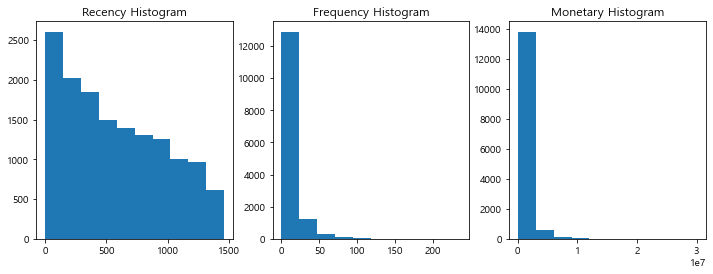

In [204]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(DF['recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(DF['frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(DF['monetary'])

- 히스토그램을 살펴보면, frequency와 monetary가 매우 skewed된 분포를 가지고 있음
- 군집화가 한쪽에 집중 될 가능성 多

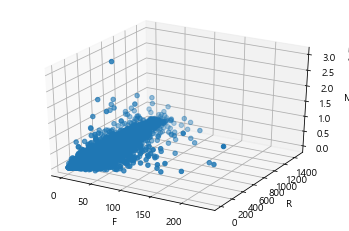

In [205]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = DF['frequency']
y = DF['recency']
z = DF['monetary']

ax.scatter(x, y, z, marker='o')

ax.set_xlabel('F')
ax.set_ylabel('R')
ax.set_zlabel('M')

plt.show()

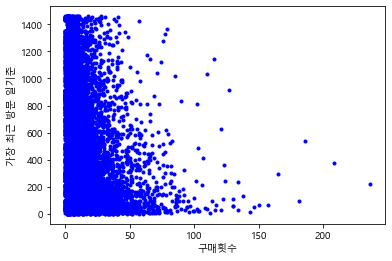

In [206]:
x = DF['frequency']
y = DF['recency']

plt.scatter(x, y, c='b', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('가장 최근 방문 일기준')

plt.show()

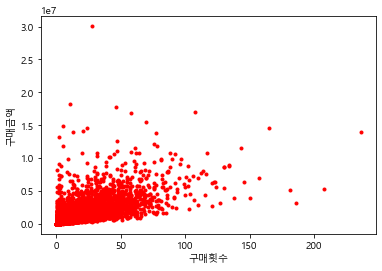

In [207]:
x = DF['frequency']
y = DF['monetary']

plt.scatter(x, y, c='r', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

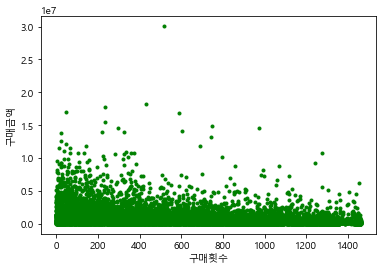

In [208]:
x = DF['recency']
y = DF['monetary']

plt.scatter(x, y, c='g', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

### 라이브러리

In [209]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from datetime import datetime
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

**1. StandardScaler**
    각 특성의 평균을 0, 분산을 1로 스케일링합니다. 즉 데이터를 정규분포로 만듭니다. 하한값과 상한값이 존재하지 않을 수 있기에, 어떤 알고리즘에서는 문제가 있을 수 있습니다. 회귀보다 분류에 유용합니다.

**2. RobustScaler**
    각 특성들의 중앙값을 0, IQR(제3사분위수-제1사분위수,Q3-Q1)을 1로 스케일링합니다. StandardScaler와 비슷하지만, 이상치의 영향을 최소화합니다.

**3. MinMaxScaler(a,b)**
    각 특성의 하한값을 a, 상한값을 b로 스케일링합니다. a=0, b=1일 경우 Normalization으로 표기할 때도 있습니다. 분류보다 회귀에 유용합니다.

**4. MaxAbsScaler**
    각 특성을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.

**5. Normalizer**
    앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다. 그러나 Normalizer의 경우 각 샘플(행)마다 적용되는 방식입니다. 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다. 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라, 모델(특히나 딥러닝) 내 학습 벡터에 적용하며, 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다

In [210]:
DF.drop('최종방문일',axis=1,inplace=True)
scaler=MinMaxScaler()
ss=StandardScaler()
rs = RobustScaler()

clusterDF=scaler.fit_transform(DF)
clusterDF2=ss.fit_transform(DF)
clusterDF3 = rs.fit_transform(DF)

### MinMaxScaler

In [211]:
clusterDF

array([[0.00847458, 0.00372669, 0.        ],
       [0.09745763, 0.04295673, 0.        ],
       [0.17372881, 0.11145125, 0.        ],
       ...,
       [0.00423729, 0.0049911 , 1.        ],
       [0.00423729, 0.00159715, 1.        ],
       [0.04237288, 0.0175354 , 1.        ]])

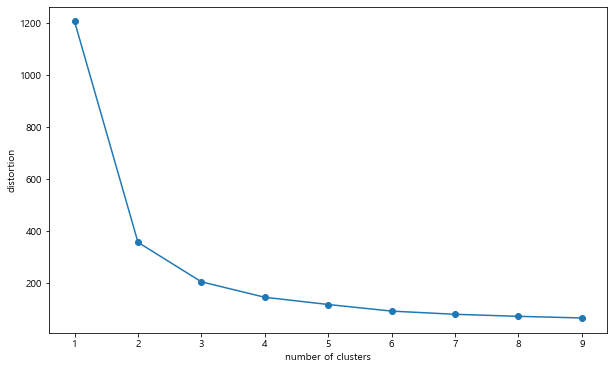

In [212]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### StandardScaler

In [213]:
clusterDF2

array([[-0.53233104, -0.53438926, -1.41667556],
       [ 0.9314917 ,  0.38785755, -1.41667556],
       [ 2.1861969 ,  1.99807389, -1.41667556],
       ...,
       [-0.60203688, -0.50466459,  2.17563173],
       [-0.60203688, -0.58445185,  2.17563173],
       [ 0.02531572, -0.20976464,  2.17563173]])

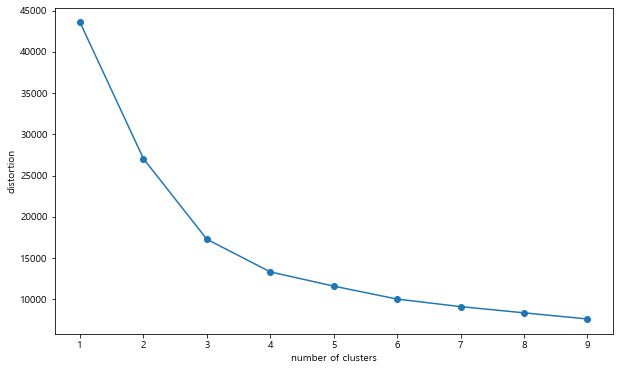

In [214]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF2)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### RobustScaler

In [215]:
clusterDF3

array([[-0.18181818, -0.29873227, -0.74927114],
       [ 1.72727273,  1.18112213, -0.74927114],
       [ 3.36363636,  3.76490523, -0.74927114],
       ...,
       [-0.27272727, -0.25103552,  1.37900875],
       [-0.27272727, -0.37906364,  1.37900875],
       [ 0.54545455,  0.22216644,  1.37900875]])

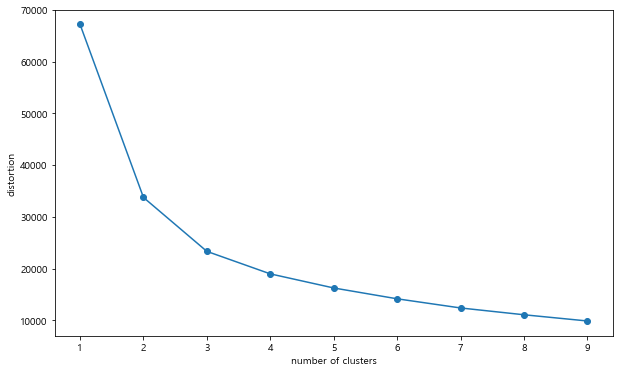

In [216]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF3)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### K-means
1) MinMaxScaler

In [217]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters= 2 the average silhouette_score is: 0.5926054004365601
for n_clusters= 3 the average silhouette_score is: 0.5136654852590105
for n_clusters= 4 the average silhouette_score is: 0.472662035524969
for n_clusters= 5 the average silhouette_score is: 0.47491138820365664
for n_clusters= 6 the average silhouette_score is: 0.45915407857187424
for n_clusters= 7 the average silhouette_score is: 0.427139168321374
for n_clusters= 8 the average silhouette_score is: 0.3953438589082521
for n_clusters= 9 the average silhouette_score is: 0.39696842439466146
for n_clusters= 10 the average silhouette_score is: 0.4075124566827231


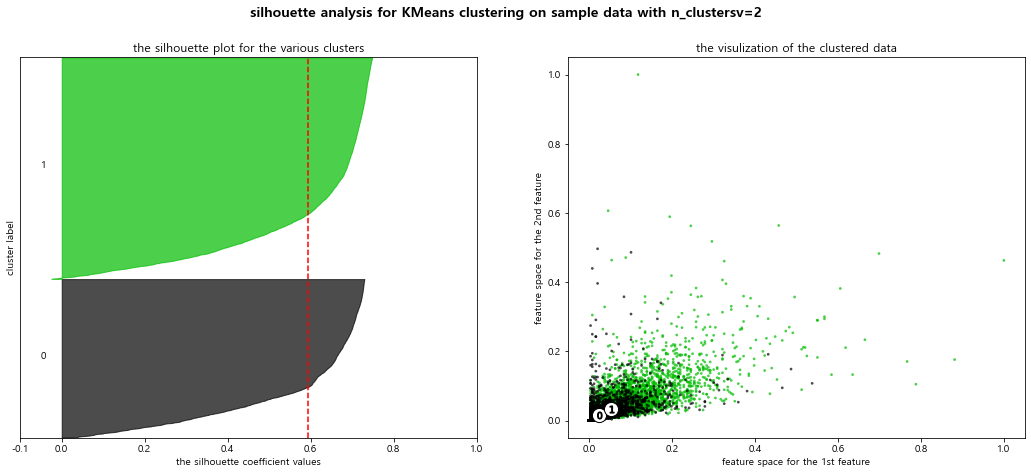

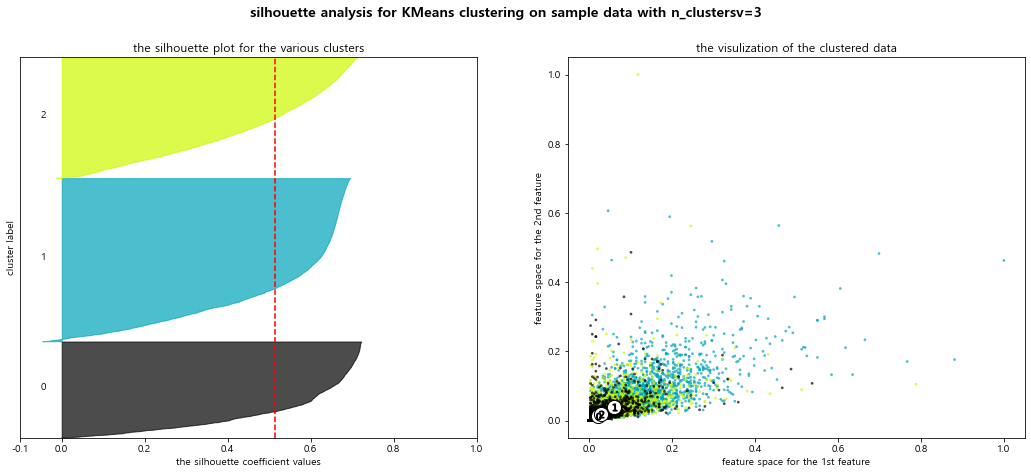

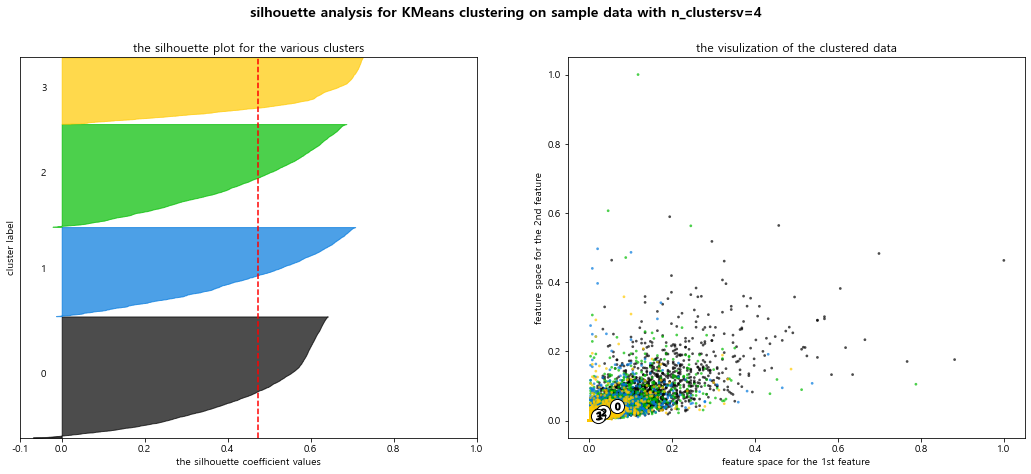

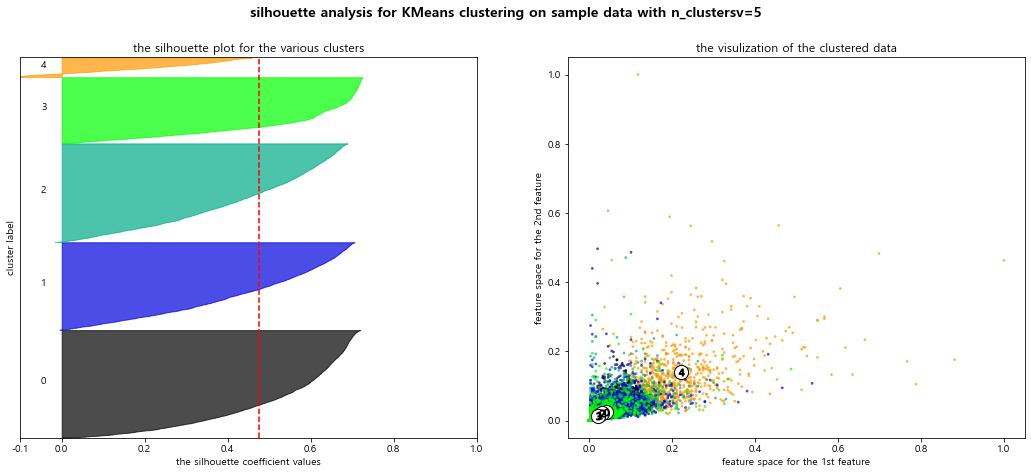

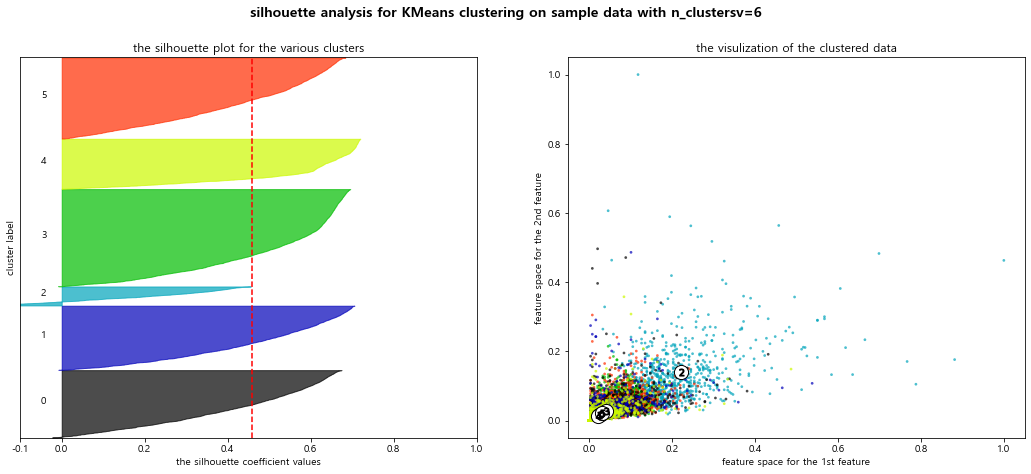

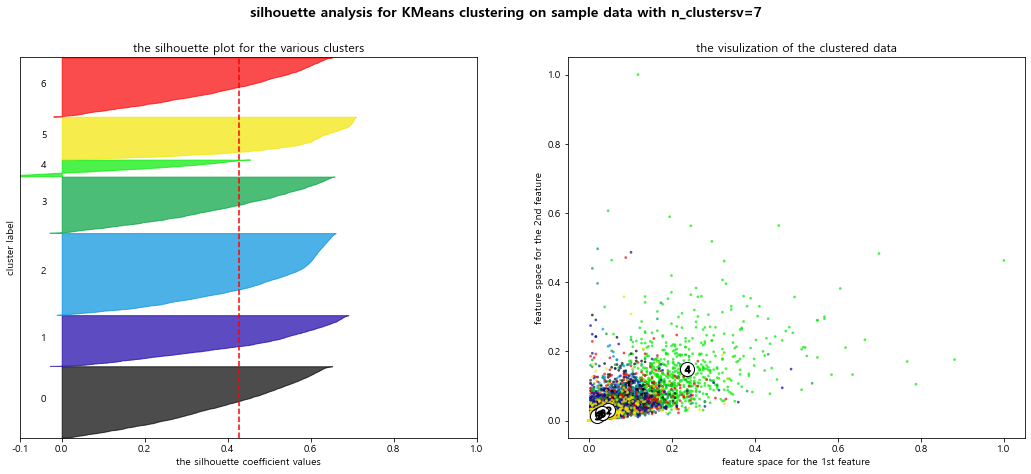

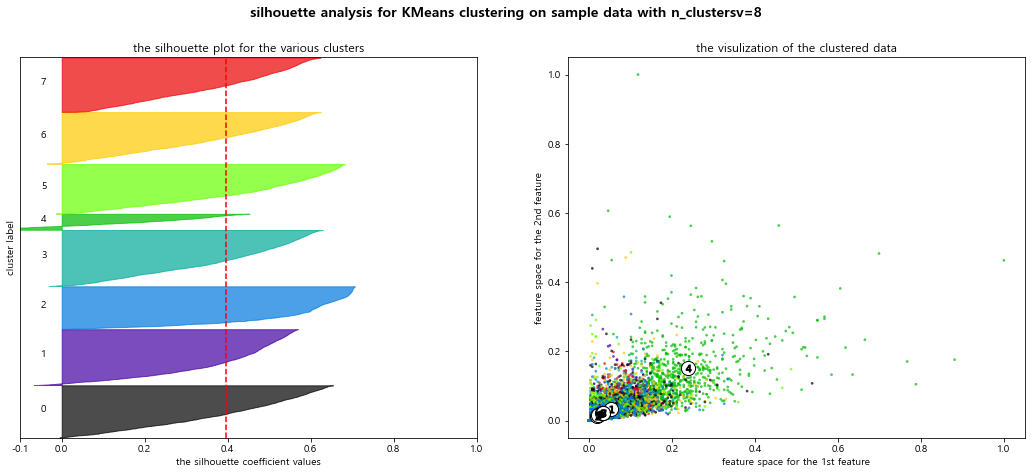

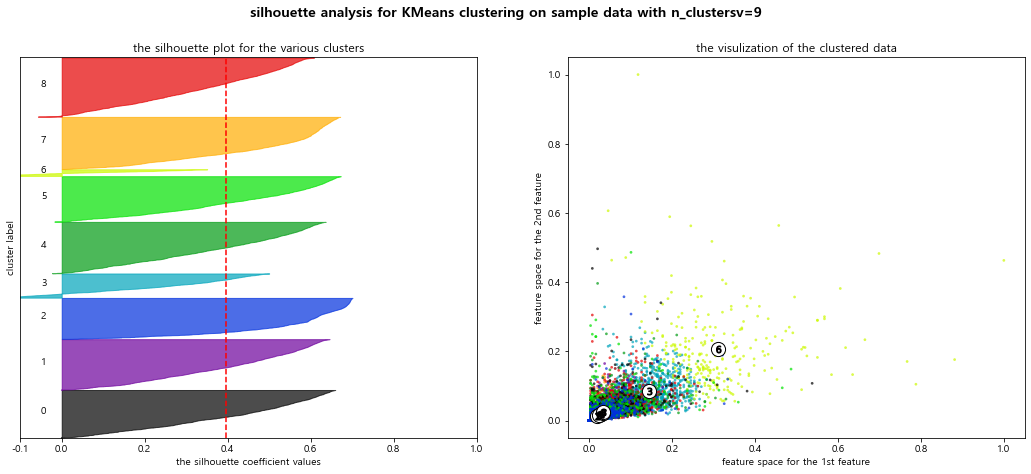

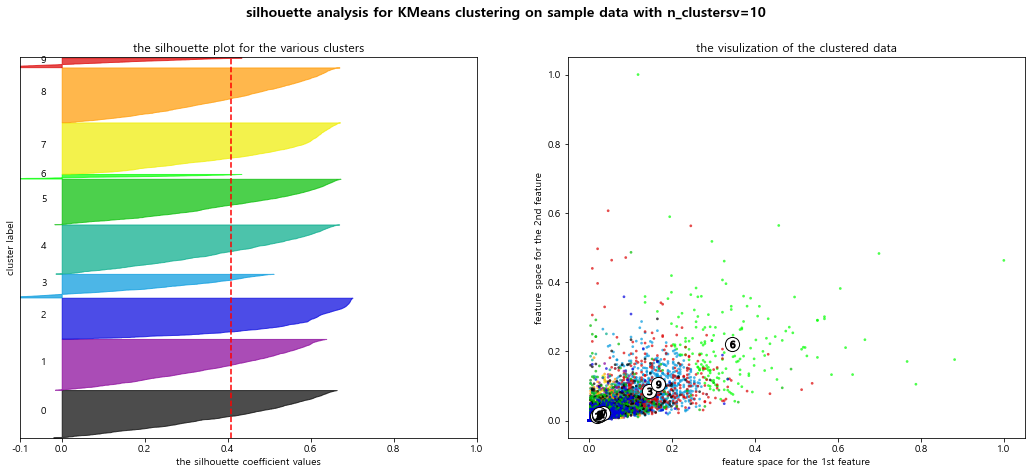

In [218]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF)
    
    silhouette_avg=silhouette_score(clusterDF,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF[:,0],clusterDF[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [219]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF=pd.DataFrame(DF)
DF['label']=cluster_labels

In [220]:
DF.groupby(['label']).mean()

,frequency,monetary,recency
label,,,
0,5.507703,3.757121e+05,620.915438
1,26.966125,2.297354e+06,361.661253
2,52.775862,7.095951e+06,287.262069


**label=0**
R↑ F↓ M↓

**label=1**
R↓ F↓ M↑

**label=2**
R↓ F↑ M↑

In [222]:
DF['label'].value_counts()

0    12074
1     2155
2      290
Name: label, dtype: int64

2) StandardScaler

for n_clusters= 2 the average silhouette_score is: 0.5606105711747437
for n_clusters= 3 the average silhouette_score is: 0.44187962093995814
for n_clusters= 4 the average silhouette_score is: 0.4469051822989132
for n_clusters= 5 the average silhouette_score is: 0.42700797860991085
for n_clusters= 6 the average silhouette_score is: 0.36752351504402203
for n_clusters= 7 the average silhouette_score is: 0.3690227691980188
for n_clusters= 8 the average silhouette_score is: 0.3801623876989876
for n_clusters= 9 the average silhouette_score is: 0.38199922503596606
for n_clusters= 10 the average silhouette_score is: 0.3701371207782086


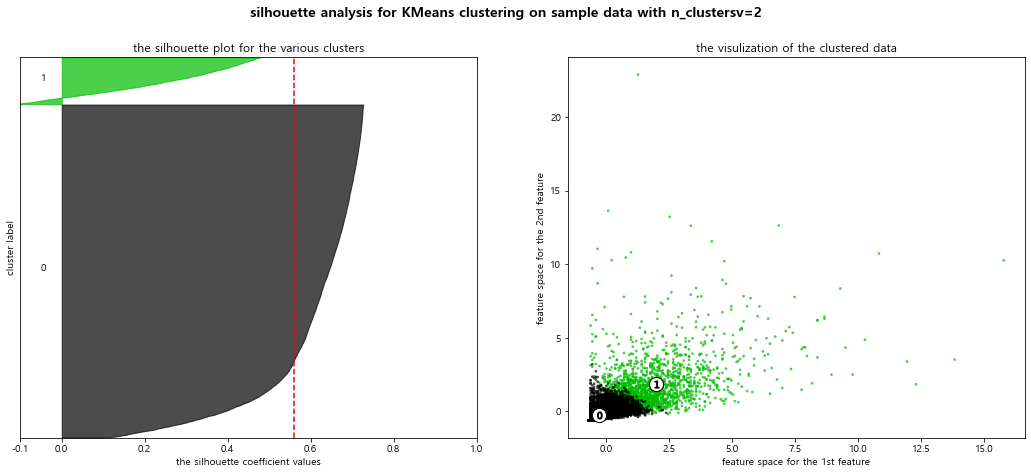

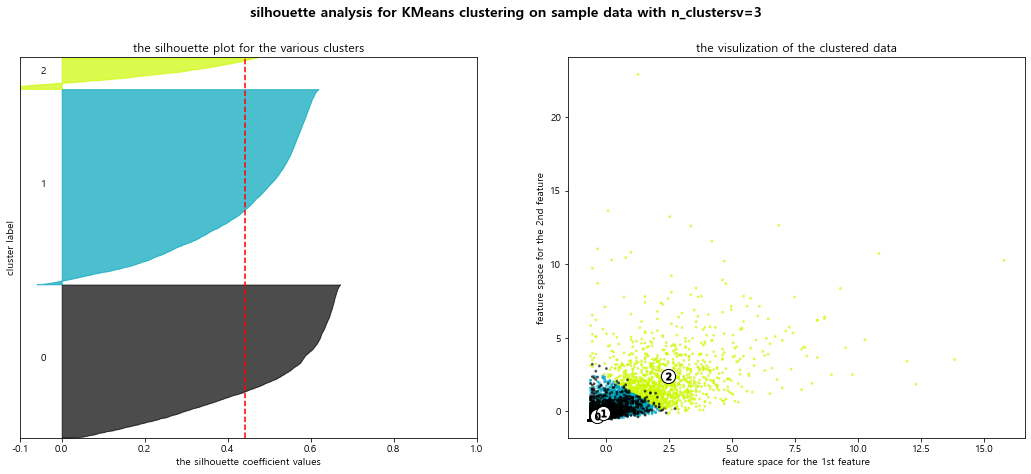

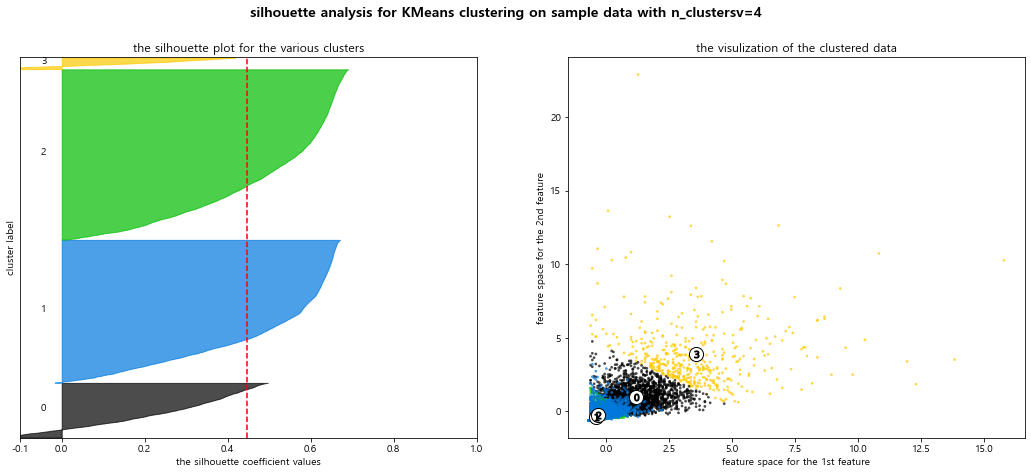

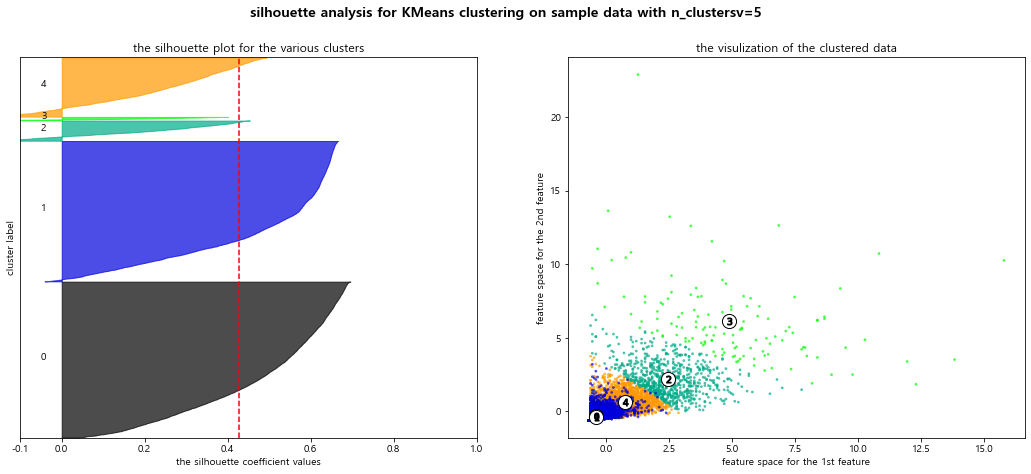

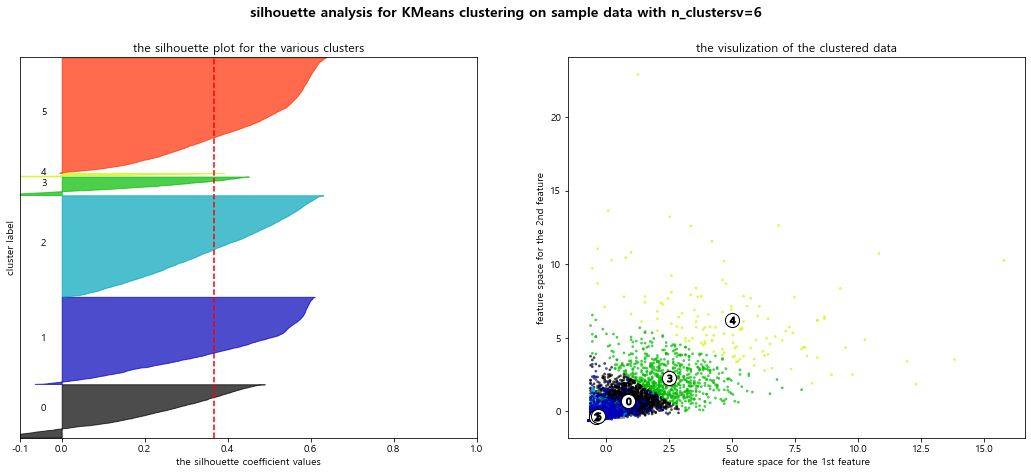

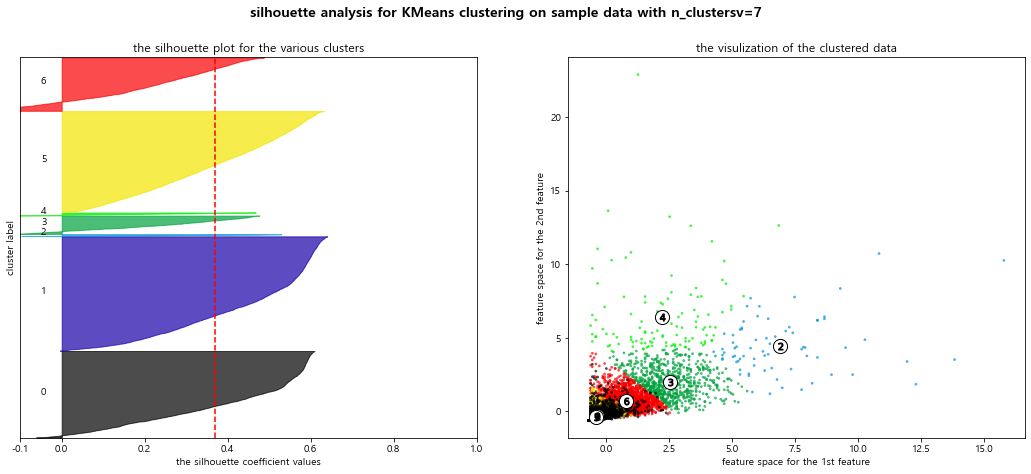

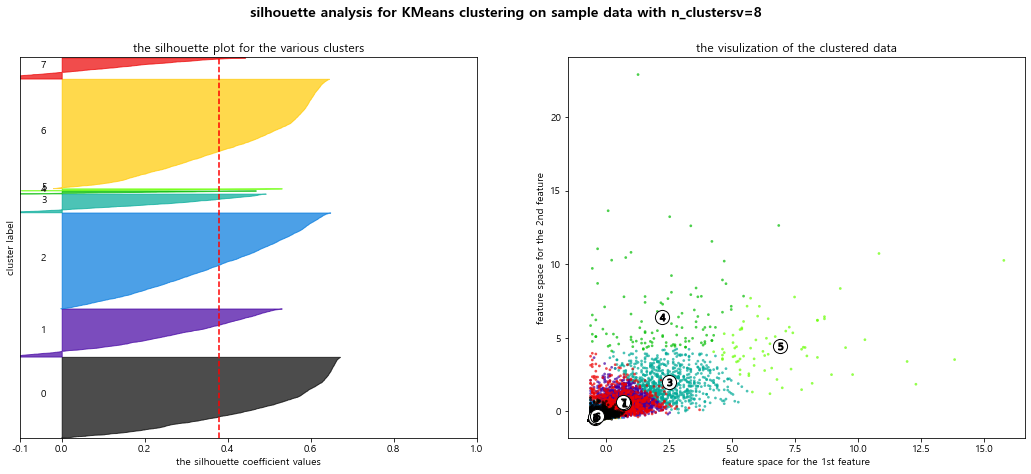

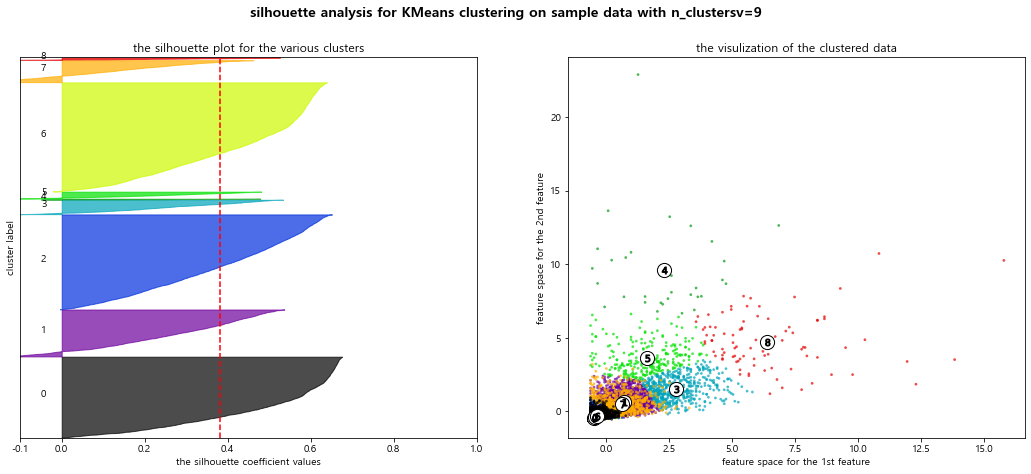

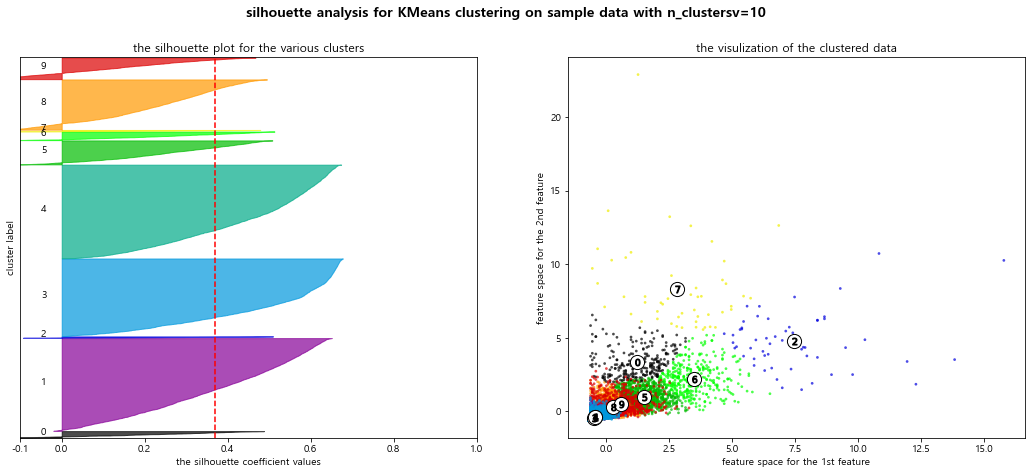

In [223]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF2)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF2)
    
    silhouette_avg=silhouette_score(clusterDF2,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF2,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF2[:,0],clusterDF2[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [224]:
kmeans=KMeans(n_clusters=4, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF['label(ss)']=cluster_labels

In [225]:
DF.groupby(['label(ss)']).mean()

,frequency,monetary,recency,label
label(ss),,,,
0,4.484022,2.952710e+05,640.188981,0.000000
1,40.280282,4.015128e+06,310.600000,1.245070
2,19.820906,1.562649e+06,405.119872,0.577595
3,59.732759,9.470898e+06,274.862069,2.000000


**label(ss)=0**
R↑ F↓ M↓


**label(ss)=1**
R↑ F↑ M↑


**label(ss)=2**
R↓ F↓ M↑


**label(ss)=3**
R↓ F↑ M↑

In [226]:
DF['label(ss)'].value_counts()

0    10890
2     2803
1      710
3      116
Name: label(ss), dtype: int64

3) RobustScaler

for n_clusters= 2 the average silhouette_score is: 0.6958974294451478
for n_clusters= 3 the average silhouette_score is: 0.5635497499569525
for n_clusters= 4 the average silhouette_score is: 0.4789290596540091
for n_clusters= 5 the average silhouette_score is: 0.36145243500772356
for n_clusters= 6 the average silhouette_score is: 0.36531248054269655
for n_clusters= 7 the average silhouette_score is: 0.3681966149098656
for n_clusters= 8 the average silhouette_score is: 0.36826300292838315
for n_clusters= 9 the average silhouette_score is: 0.3729132879745535
for n_clusters= 10 the average silhouette_score is: 0.3707367012558347


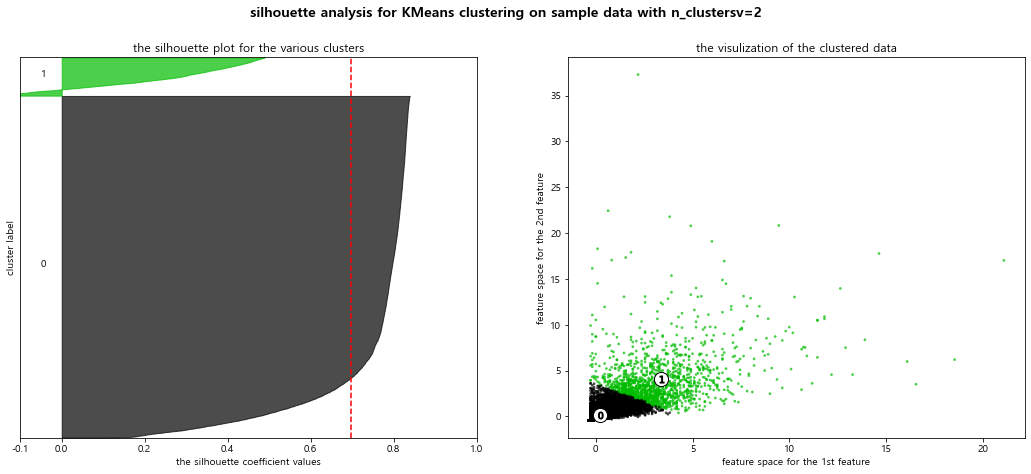

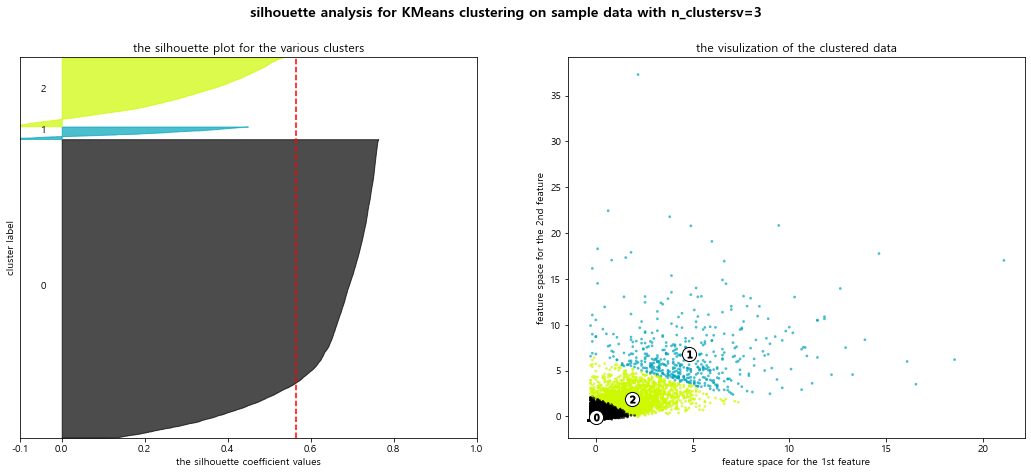

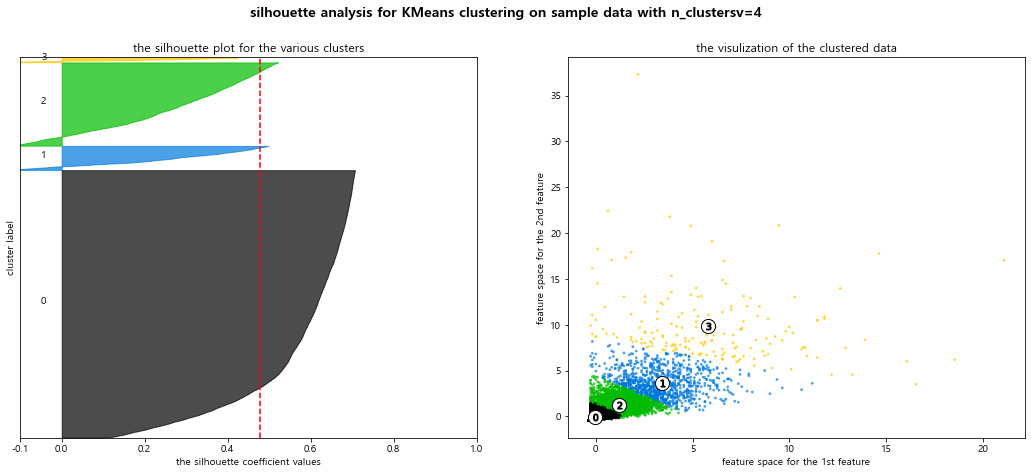

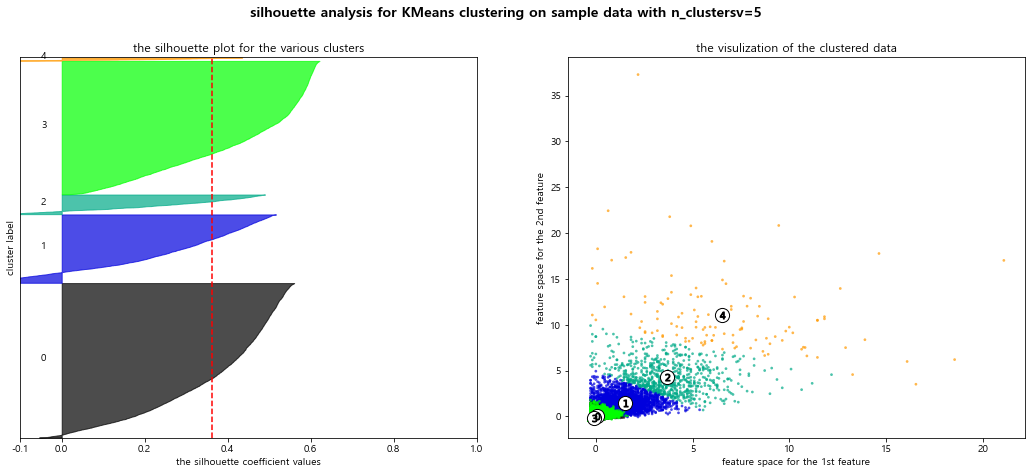

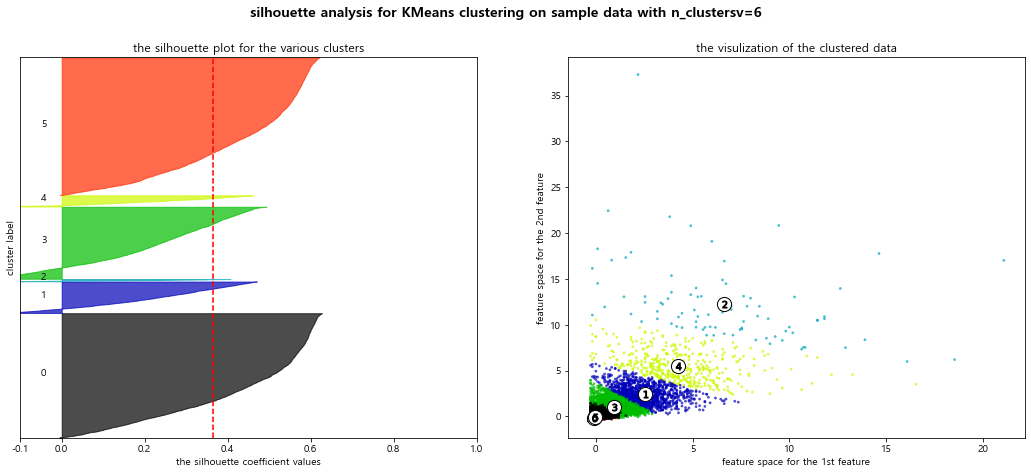

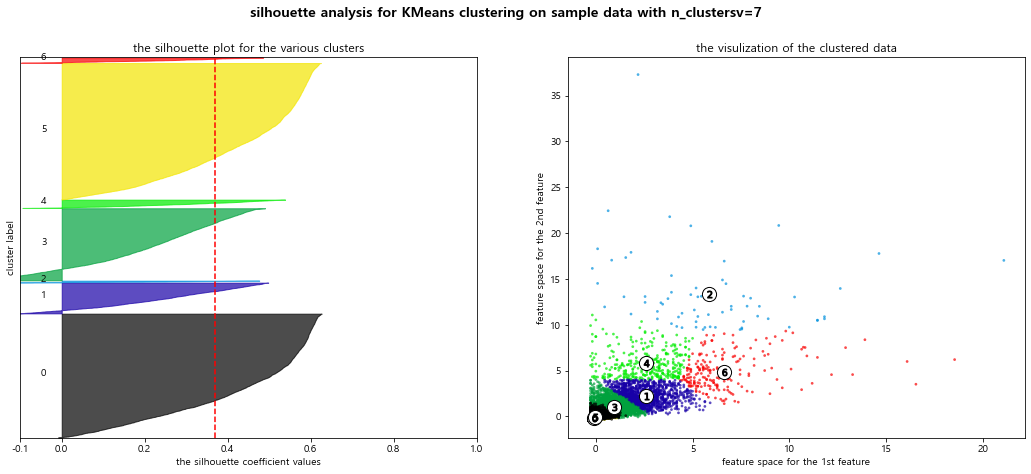

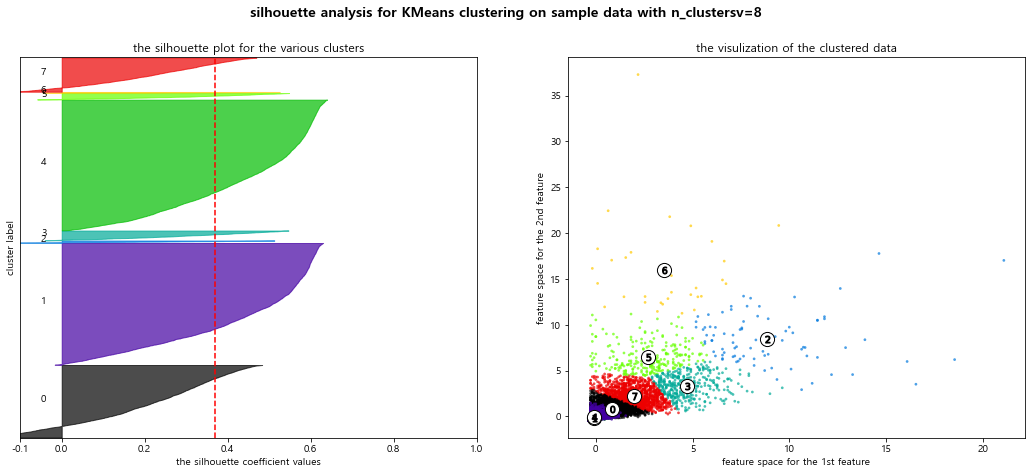

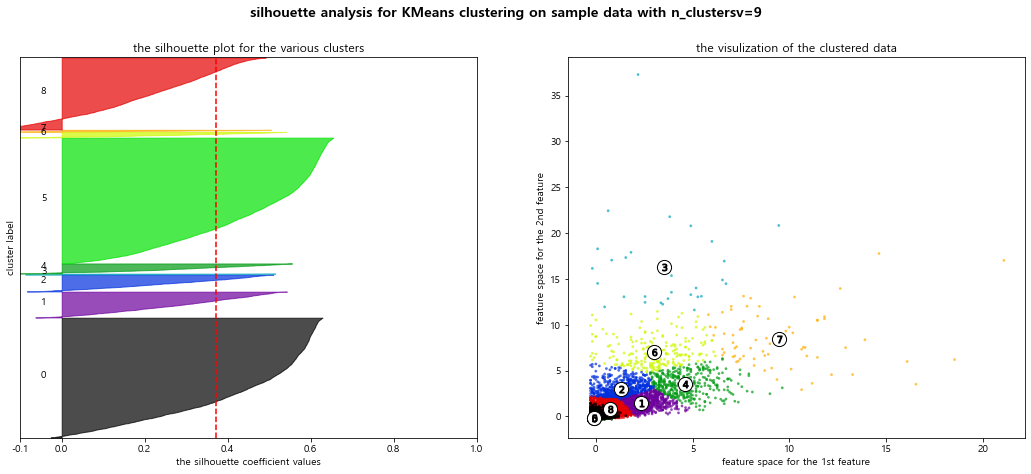

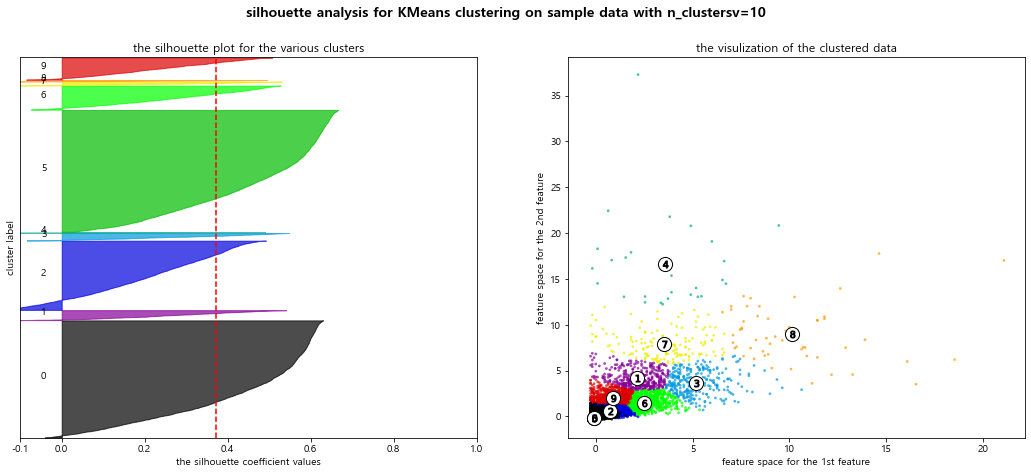

In [227]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF3)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF3)
    
    silhouette_avg=silhouette_score(clusterDF3,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF3,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF3[:,0],clusterDF3[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [228]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF[['frequency', 'monetary', 'recency']])
DF['label(rs)']=cluster_labels

In [229]:
DF.groupby(['label(rs)']).mean()

,frequency,monetary,recency,label,label(ss)
label(rs),,,,,
0,5.507703,3.757121e+05,620.915438,0.0,0.196124
1,26.966125,2.297354e+06,361.661253,1.0,1.751276
2,52.775862,7.095951e+06,287.262069,2.0,1.800000


**label(rs)=0**
R↑ F↓ M↓


**label(rs)=1**
R↓ F↓ M↑


**label(rs)=2**
R↓ F↑ M↑


In [230]:
DF['label(rs)'].value_counts()

0    12074
1     2155
2      290
Name: label(rs), dtype: int64

In [231]:
pos.set_index('고객번호',inplace=True)

In [232]:
customer=pd.concat([pos,DF],axis=1)
customer.drop(['frequency','monetary','recency'],axis=1,inplace=True)
customer.reset_index(inplace=True)
customer

,index,고객명,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일,문자수신여부,연락처,label,label(ss),label(rs)
0,00024120,성대경,꿈꾸는이상(길음신관),일반,여자,527000,10,10010,2012-11-08,2017-01-01 00:00:00,Y,01037022738,0,0,0
1,00029090,이은경,꿈꾸는이상(길음신관),일반,남자,261000,3,4180,2013-04-13,2017-01-01 00:00:00,Y,01033306609,0,0,0
2,00031696,강유선,꿈꾸는이상(길음신관),일반,남자,71000,3,1240,2013-07-23,2017-01-01 00:00:00,Y,01028081346,0,0,0
3,00042274,김선영,꿈꾸는이상(길음신관),일반,여자,407000,5,5300,2015-03-04,2017-01-01 00:00:00,N,01072934001,0,0,0
4,00048526,전승원,꿈꾸는이상(길음신관),일반,남자,112000,1,1120,2015-07-14,2017-01-01 00:00:00,N,01068534153,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14514,00094113,하은이,꿈꾸는이상(길음신관),일반,여자,508600,5,5086,2019-05-16,2020-12-31 00:00:00,N,01026326484,0,0,0
14515,00105549,박형숙,꿈꾸는이상(길음신관),일반,여자,126000,4,1260,2020-10-25,2020-12-31 00:00:00,Y,01087499936,0,0,0
14516,00106411,심동윤,꿈꾸는이상(길음신관),일반,남자,171000,1,1710,2020-12-31,2020-12-31 00:00:00,Y,01063989924,0,0,0
14517,00106415,이금희,꿈꾸는이상(길음신관),일반,남자,28000,1,280,2020-12-31,2020-12-31 00:00:00,Y,01083258004,0,0,0


In [233]:
customer.to_excel('./길음신관고객분류.xlsx', index=False, encoding='cp949')